In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#切資料/評估工具
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [3]:
#方法集
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from xgboost.sklearn import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb

In [111]:
data1=pd.read_csv(".\\data\\income_evaluation.csv")
data2_train=pd.read_csv(".\\data\\arcene_train.data",sep=" ",header=None)
data2_valid=pd.read_csv(".\\data\\arcene_valid.data",sep=" ",header=None)
data2_train_label=pd.read_csv(".\\data\\arcene_train.labels",sep=" ",header=None)
data2_valid_label=pd.read_csv(".\\data\\arcene_valid.labels",sep=" ",header=None)
data2_label=data2_train_label.append(data2_valid_label)
data2_all=data2_train.append(data2_valid).dropna(axis='columns')
data2=pd.concat([data2_all,data2_label],axis=1)
data2.columns=[x for x in range(0,10001)]
data3=pd.read_csv(".\\data\\bank_all.csv")
data4=pd.read_csv(".\\data\\Telco-Customer-Churn.csv")
data5=pd.read_csv(".\\data\\online_shoppers_intention.csv")
data6=pd.read_csv(".\\data\\Churn_Modelling.csv")

# 資料1：Income

In [143]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              32561 non-null  int64
 1    workclass       32561 non-null  int32
 2    fnlwgt          32561 non-null  int64
 3    education       32561 non-null  int32
 4    education-num   32561 non-null  int64
 5    marital-status  32561 non-null  int32
 6    occupation      32561 non-null  int32
 7    relationship    32561 non-null  int32
 8    race            32561 non-null  int32
 9    sex             32561 non-null  int32
 10   capital-gain    32561 non-null  int64
 11   capital-loss    32561 non-null  int64
 12   hours-per-week  32561 non-null  int64
 13   native-country  32561 non-null  int32
 14   income          32561 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


In [144]:
data1.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [145]:
data1[" income"].value_counts()

0    24720
1     7841
Name:  income, dtype: int64

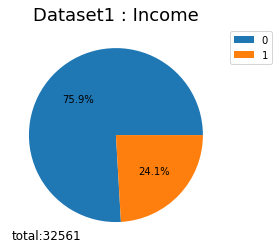

In [146]:
plt.pie(data1[" income"].value_counts(), textprops = {"fontsize" : 10},autopct = "%1.1f%%")  
plt.legend(bbox_to_anchor=(1, 1), loc='upper left',labels =data1[" income"].value_counts().index) 
plt.title('Dataset1 : Income', {"fontsize" : 18})
plt.text(-1.2, -1.2, "total:32561",{"fontsize" : 12 })
plt.show()

In [147]:
data1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [148]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data1[" workclass"]=labelencoder.fit_transform(data1[" workclass"])
data1[" education"]=labelencoder.fit_transform(data1[" education"])
data1[" marital-status"]=labelencoder.fit_transform(data1[" marital-status"])
data1[" occupation"]=labelencoder.fit_transform(data1[" occupation"])
data1[" relationship"]=labelencoder.fit_transform(data1[" relationship"])
data1[" race"]=labelencoder.fit_transform(data1[" race"])
data1[" sex"]=labelencoder.fit_transform(data1[" sex"])
data1[" native-country"]=labelencoder.fit_transform(data1[" native-country"])
data1[" income"]=labelencoder.fit_transform(data1[" income"])

In [149]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              32561 non-null  int64
 1    workclass       32561 non-null  int64
 2    fnlwgt          32561 non-null  int64
 3    education       32561 non-null  int64
 4    education-num   32561 non-null  int64
 5    marital-status  32561 non-null  int64
 6    occupation      32561 non-null  int64
 7    relationship    32561 non-null  int64
 8    race            32561 non-null  int64
 9    sex             32561 non-null  int64
 10   capital-gain    32561 non-null  int64
 11   capital-loss    32561 non-null  int64
 12   hours-per-week  32561 non-null  int64
 13   native-country  32561 non-null  int64
 14   income          32561 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [150]:
data1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [185]:
#切割資料，train:test=0.75:0.25
train_data,test_data,train_labels,test_labels=train_test_split(data1,data1[" income"],test_size=0.25)
print('Size of training dataset:', train_data.shape)
print('Size of testing dataset:', test_data.shape)

Size of training dataset: (24420, 15)
Size of testing dataset: (8141, 15)


In [186]:
from sklearn.neighbors import KNeighborsClassifier
# Create the model
knn = KNeighborsClassifier(n_neighbors=5)

# Learn on the train subset
knn.fit(train_data, train_labels)

# Predict on the testing subset
predicted = knn.predict(test_data)

# Calculate accuracy
accuracy = knn.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

Accuracy of testing dataset:  0.7792654465053434


In [187]:
predicted_knn=np.append (predicted,accuracy)
predicted_knn=pd.DataFrame(predicted_knn)
predicted_knn.to_csv('.\\predict data\\predicted_knn_1_3.csv')

In [188]:
from sklearn.linear_model import LogisticRegression
# Create the model
lm = LogisticRegression(solver="lbfgs")

# Learn on the train subset
lm.fit(train_data, train_labels)

# Predict on the testing subset
predicted =lm.predict(test_data)

# Calculate accuracy
accuracy = lm.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

Accuracy of testing dataset:  0.789952094337305


In [189]:
predicted_LM=np.append (predicted,accuracy)
predicted_LM=pd.DataFrame(predicted_LM)
predicted_LM.to_csv('.\\predict data\\predicted_LM_1_3.csv')

In [190]:
from sklearn.ensemble import RandomForestClassifier
# Create the model
RF = RandomForestClassifier()

# Learn on the train subset
RF.fit(train_data, train_labels)

# Predict on the testing subset
predicted =RF.predict(test_data)

# Calculate accuracy
accuracy = RF.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

Accuracy of testing dataset:  1.0


In [191]:
predicted_RF=np.append (predicted,accuracy)
predicted_RF=pd.DataFrame(predicted_RF)
predicted_RF.to_csv('.\\predict data\\predicted_RF_1_3.csv')

In [192]:
from sklearn.neural_network import MLPClassifier
# Create the model
MLP = MLPClassifier()

# Learn the digits on the train subset
MLP.fit(train_data, train_labels)

# Predict the value of the digit on the testing subset
predicted_MLP = MLP.predict(test_data)

# Calculate accuracy
accuracy =  MLP.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

Accuracy of testing dataset:  0.7936371453138436


In [193]:
predicted_MLP=np.append (predicted,accuracy)
predicted_MLP=pd.DataFrame(predicted_MLP)
predicted_MLP.to_csv('.\\predict data\\predicted_MLP_1_3.csv')

In [194]:
from sklearn import svm
# Create the model
svc = svm.SVC()

# Learn the digits on the train subset
svc.fit(train_data, train_labels)

# Predict the value of the digit on the testing subset
predicted_svc = svc.predict(test_data)

# Calculate accuracy
accuracy = svc.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

Accuracy of testing dataset:  0.7940056504114974


In [195]:
predicted_svc=np.append (predicted,accuracy)
predicted_svc=pd.DataFrame(predicted_svc)
predicted_svc.to_csv('.\\predict data\\predicted_svc_1_3.csv')

In [196]:
from xgboost import XGBClassifier
# Create the model
XGB = XGBClassifier()

# Learn the digits on the train subset
XGB.fit(train_data, train_labels)

# Predict the value of the digit on the testing subset
predicted_XGB = XGB.predict(test_data)

# Calculate accuracy
accuracy = XGB.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:36:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of testing dataset:  1.0


In [197]:
predicted_XGB=np.append (predicted,accuracy)
predicted_XGB=pd.DataFrame(predicted_XGB)
predicted_XGB.to_csv('.\\predict data\\predicted_XGB_1_3.csv')

In [198]:
from catboost import CatBoostClassifier
# Create the model
CAT = CatBoostClassifier(iterations=10,
              learning_rate=1,
              depth=2,
              loss_function='MultiClass')

# Learn the digits on the train subset
CAT.fit(train_data, train_labels)

# Predict the value of the digit on the testing subset
predicted = CAT.predict(test_data)

# Calculate accuracy
accuracy = CAT.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

0:	learn: 0.1271623	total: 3.34ms	remaining: 30.1ms
1:	learn: 0.0427476	total: 6.33ms	remaining: 25.3ms
2:	learn: 0.0153458	total: 9.02ms	remaining: 21.1ms
3:	learn: 0.0056773	total: 11.7ms	remaining: 17.6ms
4:	learn: 0.0021587	total: 14.4ms	remaining: 14.4ms
5:	learn: 0.0008761	total: 17.7ms	remaining: 11.8ms
6:	learn: 0.0003980	total: 20.9ms	remaining: 8.98ms
7:	learn: 0.0001942	total: 24.3ms	remaining: 6.09ms
8:	learn: 0.0001125	total: 27.8ms	remaining: 3.09ms
9:	learn: 0.0000758	total: 31.2ms	remaining: 0us
Accuracy of testing dataset:  1.0


In [199]:
predicted_CAT=np.append (predicted,accuracy)
predicted_CAT=pd.DataFrame(predicted_CAT)
predicted_CAT.to_csv('.\\predict data\\predicted_CAT_1_3.csv')

In [200]:
import lightgbm as lgb
# Create the model
LGBM = lgb.LGBMClassifier(application='multiclass', boosting='gbdt', learning_rate=0.1, max_depth=-5, feature_fraction=0.5, random_state=42)

# Learn the digits on the train subset
LGBM.fit(train_data, train_labels)

# Predict the value of the digit on the testing subset
predicted = LGBM.predict(test_data)

# Calculate accuracy
accuracy =LGBM.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
Accuracy of testing dataset:  1.0


In [201]:
predicted_LGBM=np.append (predicted,accuracy)
predicted_LGBM=pd.DataFrame(predicted_LGBM)
predicted_LGBM.to_csv('.\\predict data\\predicted_LGBM_1_4.csv')

# 資料2：Arcene

In [22]:
data2.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,0,71,0,95,0,538,404,20,0,0,...,570,86,0,36,0,80,0,0,524,1
1,0,41,82,165,60,554,379,0,71,0,...,605,69,7,473,0,57,0,284,423,-1
2,0,0,1,40,0,451,402,0,0,0,...,593,28,0,24,0,90,0,34,508,1
3,0,56,44,275,14,511,470,0,0,0,...,600,0,26,86,0,102,0,0,469,1
4,105,0,141,348,0,268,329,0,0,1,...,0,0,0,0,190,301,0,0,354,-1


In [23]:
data2.iloc[:,-1].value_counts()

-1    112
 1     88
Name: 10000, dtype: int64

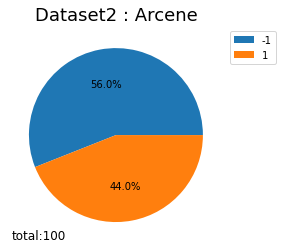

In [24]:
plt.pie(data2.iloc[:,-1].value_counts(), textprops = {"fontsize" : 10},autopct = "%1.1f%%")  
plt.legend(bbox_to_anchor=(1, 1), loc='upper left',labels =data2.iloc[:,-1].value_counts().index) 
plt.title('Dataset2 : Arcene', {"fontsize" : 18})
plt.text(-1.2, -1.2, "total:100",{"fontsize" : 12 })
plt.show()

In [25]:
data2.columns=[x for x in range(0,10001)]

In [26]:
#切割資料，train:test=0.75:0.25
train_data,test_data,train_labels,test_labels=train_test_split(data2,data2.iloc[:,-1],test_size=0.25)
print('Size of training dataset:', train_data.shape)
print('Size of testing dataset:', test_data.shape)

Size of training dataset: (150, 10001)
Size of testing dataset: (50, 10001)


In [27]:
from sklearn.neighbors import KNeighborsClassifier
# Create the model
knn = KNeighborsClassifier(n_neighbors=5)

# Learn on the train subset
knn.fit(train_data, train_labels)

# Predict on the testing subset
predicted = knn.predict(test_data)

# Calculate accuracy
accuracy = knn.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

Accuracy of testing dataset:  0.76


In [28]:
from sklearn.linear_model import LogisticRegression
# Create the model
lm = LogisticRegression(solver="lbfgs")

# Learn on the train subset
lm.fit(train_data, train_labels)

# Predict on the testing subset
predicted =lm.predict(test_data)

# Calculate accuracy
accuracy = lm.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

Accuracy of testing dataset:  0.9


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [29]:
from sklearn.ensemble import RandomForestRegressor
# Create the model
RF = RandomForestRegressor()

# Learn on the train subset
RF.fit(train_data, train_labels)

# Predict on the testing subset
predicted =RF.predict(test_data)

# Calculate accuracy
accuracy = RF.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

Accuracy of testing dataset:  1.0


In [30]:
from sklearn.neural_network import MLPClassifier
# Create the model
MLP = MLPClassifier()

# Learn the digits on the train subset
MLP.fit(train_data, train_labels)

# Predict the value of the digit on the testing subset
predicted = MLP.predict(test_data)

# Calculate accuracy
accuracy =  MLP.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

Accuracy of testing dataset:  0.5


In [31]:
from sklearn import svm
# Create the model
svc = svm.SVC()

# Learn the digits on the train subset
svc.fit(train_data, train_labels)

# Predict the value of the digit on the testing subset
predicted = svc.predict(test_data)

# Calculate accuracy
accuracy = svc.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

Accuracy of testing dataset:  0.72


In [32]:
from xgboost import XGBClassifier
# Create the model
XGB = XGBClassifier()

# Learn the digits on the train subset
XGB.fit(train_data, train_labels)

# Predict the value of the digit on the testing subset
predicted = XGB.predict(test_data)

# Calculate accuracy
accuracy = XGB.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:55:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of testing dataset:  1.0


In [33]:
from catboost import CatBoostClassifier
# Create the model
CAT = CatBoostClassifier(iterations=10,
              learning_rate=1,
              depth=2,
              loss_function='MultiClass')

# Learn the digits on the train subset
CAT.fit(train_data, train_labels)

# Predict the value of the digit on the testing subset
predicted = CAT.predict(test_data)

# Calculate accuracy
accuracy = CAT.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

0:	learn: 0.1639927	total: 91.1ms	remaining: 820ms
1:	learn: 0.0658755	total: 133ms	remaining: 534ms
2:	learn: 0.0339619	total: 174ms	remaining: 406ms
3:	learn: 0.0212341	total: 219ms	remaining: 328ms
4:	learn: 0.0146798	total: 260ms	remaining: 260ms
5:	learn: 0.0112006	total: 303ms	remaining: 202ms
6:	learn: 0.0089871	total: 364ms	remaining: 156ms
7:	learn: 0.0074643	total: 422ms	remaining: 106ms
8:	learn: 0.0063680	total: 469ms	remaining: 52.1ms
9:	learn: 0.0055453	total: 511ms	remaining: 0us
Accuracy of testing dataset:  1.0


In [34]:
import lightgbm as lgb
# Create the model
LGBM = lgb.LGBMClassifier(application='multiclass', boosting='gbdt', learning_rate=0.1, max_depth=-5, feature_fraction=0.5, random_state=42)

# Learn the digits on the train subset
LGBM.fit(train_data, train_labels)

# Predict the value of the digit on the testing subset
predicted = LGBM.predict(test_data)

# Calculate accuracy
accuracy =LGBM.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
Accuracy of testing dataset:  1.0


# 資料3：Bank

In [35]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [36]:
data3.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [37]:
data3["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

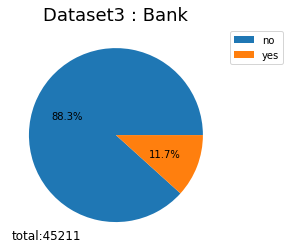

In [38]:
plt.pie(data3["y"].value_counts(), textprops = {"fontsize" : 10},autopct = "%1.1f%%")  
plt.legend(bbox_to_anchor=(1, 1), loc='upper left',labels =data3["y"].value_counts().index) 
plt.title('Dataset3 : Bank', {"fontsize" : 18})
plt.text(-1.2, -1.2, "total:45211",{"fontsize" : 12 })
plt.show()

In [39]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data3['job']=labelencoder.fit_transform(data3['job'])
data3['marital']=labelencoder.fit_transform(data3['marital'])
data3["education"]=labelencoder.fit_transform(data3["education"])
data3["default"]=labelencoder.fit_transform(data3["default"])
data3["housing"]=labelencoder.fit_transform(data3["housing"])
data3["loan"]=labelencoder.fit_transform(data3["loan"])
data3["contact"]=labelencoder.fit_transform(data3["contact"])
data3["month"]=labelencoder.fit_transform(data3["month"])
data3["poutcome"]=labelencoder.fit_transform(data3["poutcome"])
data3["y"]=labelencoder.fit_transform(data3["y"])

In [40]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int32
 9   day        45211 non-null  int64
 10  month      45211 non-null  int32
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int32
 16  y          45211 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 4.1 MB


In [41]:
data3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [42]:
#切割資料，train:test=0.75:0.25
train_data,test_data,train_labels,test_labels=train_test_split(data3,data3["y"],test_size=0.25)
print('Size of training dataset:', train_data.shape)
print('Size of testing dataset:', test_data.shape)

Size of training dataset: (33908, 17)
Size of testing dataset: (11303, 17)


In [43]:
from sklearn.neighbors import KNeighborsClassifier
# Create the model
knn = KNeighborsClassifier(n_neighbors=5)

# Learn on the train subset
knn.fit(train_data, train_labels)

# Predict on the testing subset
predicted = knn.predict(test_data)

# Calculate accuracy
accuracy = knn.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

Accuracy of testing dataset:  0.8783508802972663


In [44]:
from sklearn.linear_model import LogisticRegression
# Create the model
lm = LogisticRegression(solver="lbfgs")

# Learn on the train subset
lm.fit(train_data, train_labels)

# Predict on the testing subset
predicted =lm.predict(test_data)

# Calculate accuracy
accuracy = lm.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

Accuracy of testing dataset:  0.9404582854109529


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [45]:
from sklearn.ensemble import RandomForestRegressor
# Create the model
RF = RandomForestRegressor()

# Learn on the train subset
RF.fit(train_data, train_labels)

# Predict on the testing subset
predicted =RF.predict(test_data)

# Calculate accuracy
accuracy = RF.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

Accuracy of testing dataset:  1.0


In [46]:
from sklearn.neural_network import MLPClassifier
# Create the model
MLP = MLPClassifier()

# Learn the digits on the train subset
MLP.fit(train_data, train_labels)

# Predict the value of the digit on the testing subset
predicted = MLP.predict(test_data)

# Calculate accuracy
accuracy =  MLP.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

Accuracy of testing dataset:  0.9997345837388304


In [47]:
from sklearn import svm
# Create the model
svc = svm.SVC()

# Learn the digits on the train subset
svc.fit(train_data, train_labels)

# Predict the value of the digit on the testing subset
predicted = svc.predict(test_data)

# Calculate accuracy
accuracy = svc.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

Accuracy of testing dataset:  0.8817128196054145


In [48]:
from xgboost import XGBClassifier
# Create the model
XGB = XGBClassifier()

# Learn the digits on the train subset
XGB.fit(train_data, train_labels)

# Predict the value of the digit on the testing subset
predicted = XGB.predict(test_data)

# Calculate accuracy
accuracy = XGB.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

[23:56:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy of testing dataset:  1.0


In [49]:
from catboost import CatBoostClassifier
# Create the model
CAT = CatBoostClassifier(iterations=10,
              learning_rate=1,
              depth=2,
              loss_function='MultiClass')

# Learn the digits on the train subset
CAT.fit(train_data, train_labels)

# Predict the value of the digit on the testing subset
predicted = CAT.predict(test_data)

# Calculate accuracy
accuracy = CAT.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

0:	learn: 0.1270967	total: 41.1ms	remaining: 370ms
1:	learn: 0.0426955	total: 47.6ms	remaining: 190ms
2:	learn: 0.0153144	total: 53.6ms	remaining: 125ms
3:	learn: 0.0056273	total: 60.3ms	remaining: 90.5ms
4:	learn: 0.0021112	total: 66.2ms	remaining: 66.2ms
5:	learn: 0.0008320	total: 72.1ms	remaining: 48.1ms
6:	learn: 0.0003592	total: 78ms	remaining: 33.4ms
7:	learn: 0.0001722	total: 82.9ms	remaining: 20.7ms
8:	learn: 0.0000974	total: 87.8ms	remaining: 9.76ms
9:	learn: 0.0000642	total: 92.8ms	remaining: 0us
Accuracy of testing dataset:  1.0


In [50]:
import lightgbm as lgb
# Create the model
LGBM = lgb.LGBMClassifier(application='multiclass', boosting='gbdt', learning_rate=0.1, max_depth=-5, feature_fraction=0.5, random_state=42)

# Learn the digits on the train subset
LGBM.fit(train_data, train_labels)

# Predict the value of the digit on the testing subset
predicted = LGBM.predict(test_data)

# Calculate accuracy
accuracy =LGBM.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
Accuracy of testing dataset:  1.0


# 資料4：BlastChar

In [51]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [52]:
data4["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

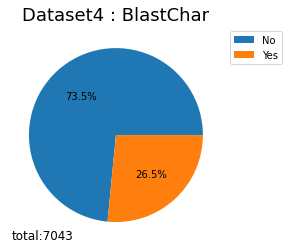

In [53]:
plt.pie(data4["Churn"].value_counts(), textprops = {"fontsize" : 10},autopct = "%1.1f%%")  
plt.legend(bbox_to_anchor=(1, 1), loc='upper left',labels =data4["Churn"].value_counts().index) 
plt.title('Dataset4 : BlastChar', {"fontsize" : 18})
plt.text(-1.2, -1.2, "total:7043",{"fontsize" : 12 })
plt.show()

In [54]:
data4.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [55]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data4['customerID']=labelencoder.fit_transform(data4['customerID'])
data4['gender']=labelencoder.fit_transform(data4['gender'])
data4['Partner']=labelencoder.fit_transform(data4['Partner'])
data4['Dependents']=labelencoder.fit_transform(data4['Dependents'])
data4['PhoneService']=labelencoder.fit_transform(data4['PhoneService'])
data4['MultipleLines']=labelencoder.fit_transform(data4['MultipleLines'])
data4['InternetService']=labelencoder.fit_transform(data4['InternetService'])
data4['OnlineSecurity']=labelencoder.fit_transform(data4['OnlineSecurity'])
data4['OnlineBackup']=labelencoder.fit_transform(data4['OnlineBackup'])
data4['DeviceProtection']=labelencoder.fit_transform(data4['DeviceProtection'])
data4['TechSupport']=labelencoder.fit_transform(data4['TechSupport'])
data4['DeviceProtection']=labelencoder.fit_transform(data4['DeviceProtection'])
data4['StreamingTV']=labelencoder.fit_transform(data4['StreamingTV'])
data4['StreamingMovies']=labelencoder.fit_transform(data4['StreamingMovies'])
data4['Contract']=labelencoder.fit_transform(data4['Contract'])
data4['PaperlessBilling']=labelencoder.fit_transform(data4['PaperlessBilling'])
data4['PaymentMethod']=labelencoder.fit_transform(data4['PaymentMethod'])
data4['TotalCharges']=labelencoder.fit_transform(data4['TotalCharges'])
data4['Churn']=labelencoder.fit_transform(data4['Churn'])

In [56]:
data4.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [57]:
#切割資料，train:test=0.75:0.25
train_data,test_data,train_labels,test_labels=train_test_split(data4,data4["Churn"],test_size=0.25)
print('Size of training dataset:', train_data.shape)
print('Size of testing dataset:', test_data.shape)

Size of training dataset: (5282, 21)
Size of testing dataset: (1761, 21)


In [58]:
from sklearn.neighbors import KNeighborsClassifier
# Create the model
knn = KNeighborsClassifier(n_neighbors=5)

# Learn on the train subset
knn.fit(train_data, train_labels)

# Predict on the testing subset
predicted = knn.predict(test_data)

# Calculate accuracy
accuracy = knn.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

Accuracy of testing dataset:  0.6842703009653606


In [59]:
from sklearn.linear_model import LogisticRegression
# Create the model
lm = LogisticRegression(solver="lbfgs")

# Learn on the train subset
lm.fit(train_data, train_labels)

# Predict on the testing subset
predicted =lm.predict(test_data)

# Calculate accuracy
accuracy = lm.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

Accuracy of testing dataset:  0.9943214082907439


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [60]:
from sklearn.ensemble import RandomForestRegressor
# Create the model
RF = RandomForestRegressor()

# Learn on the train subset
RF.fit(train_data, train_labels)

# Predict on the testing subset
predicted =RF.predict(test_data)

# Calculate accuracy
accuracy = RF.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

Accuracy of testing dataset:  1.0


In [61]:
from sklearn.neural_network import MLPClassifier
# Create the model
MLP = MLPClassifier()

# Learn the digits on the train subset
MLP.fit(train_data, train_labels)

# Predict the value of the digit on the testing subset
predicted = MLP.predict(test_data)

# Calculate accuracy
accuracy =  MLP.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

Accuracy of testing dataset:  0.9647927314026121


In [62]:
from sklearn import svm
# Create the model
svc = svm.SVC()

# Learn the digits on the train subset
svc.fit(train_data, train_labels)

# Predict the value of the digit on the testing subset
predicted = svc.predict(test_data)

# Calculate accuracy
accuracy = svc.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

Accuracy of testing dataset:  0.7331061896649631


In [63]:
from xgboost import XGBClassifier
# Create the model
XGB = XGBClassifier()

# Learn the digits on the train subset
XGB.fit(train_data, train_labels)

# Predict the value of the digit on the testing subset
predicted = XGB.predict(test_data)

# Calculate accuracy
accuracy = XGB.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

[23:56:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of testing dataset:  1.0


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [64]:
from catboost import CatBoostClassifier
# Create the model
CAT = CatBoostClassifier(iterations=10,
              learning_rate=1,
              depth=2,
              loss_function='MultiClass')

# Learn the digits on the train subset
CAT.fit(train_data, train_labels)

# Predict the value of the digit on the testing subset
predicted = CAT.predict(test_data)

# Calculate accuracy
accuracy = CAT.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

0:	learn: 0.1280103	total: 2.17ms	remaining: 19.6ms
1:	learn: 0.0433946	total: 3.97ms	remaining: 15.9ms
2:	learn: 0.0159271	total: 5.64ms	remaining: 13.2ms
3:	learn: 0.0062041	total: 7.11ms	remaining: 10.7ms
4:	learn: 0.0026121	total: 9.35ms	remaining: 9.35ms
5:	learn: 0.0012609	total: 11ms	remaining: 7.32ms
6:	learn: 0.0007170	total: 12.6ms	remaining: 5.39ms
7:	learn: 0.0004732	total: 14.1ms	remaining: 3.53ms
8:	learn: 0.0003457	total: 15.6ms	remaining: 1.73ms
9:	learn: 0.0002702	total: 17.5ms	remaining: 0us
Accuracy of testing dataset:  1.0


In [65]:
import lightgbm as lgb
# Create the model
LGBM = lgb.LGBMClassifier(application='multiclass', boosting='gbdt', learning_rate=0.1, max_depth=-5, feature_fraction=0.5, random_state=42)

# Learn the digits on the train subset
LGBM.fit(train_data, train_labels)

# Predict the value of the digit on the testing subset
predicted = LGBM.predict(test_data)

# Calculate accuracy
accuracy =LGBM.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
Accuracy of testing dataset:  1.0


# 資料5：Shoppers

In [66]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [67]:
data5["Revenue"].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

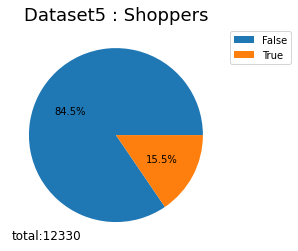

In [68]:
plt.pie(data5["Revenue"].value_counts(), textprops = {"fontsize" : 10},autopct = "%1.1f%%")  
plt.legend(bbox_to_anchor=(1, 1), loc='upper left',labels =data5["Revenue"].value_counts().index) 
plt.title('Dataset5 : Shoppers', {"fontsize" : 18})
plt.text(-1.2, -1.2, "total:12330",{"fontsize" : 12 })
plt.show()

In [69]:
data5.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [70]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data5['SpecialDay']=labelencoder.fit_transform(data5['SpecialDay'])
data5['Month']=labelencoder.fit_transform(data5['Month'])
data5['VisitorType']=labelencoder.fit_transform(data5['VisitorType'])
data5['Weekend']=labelencoder.fit_transform(data5['Weekend'])
data5['Revenue']=labelencoder.fit_transform(data5['Revenue'])

In [71]:
data5.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0,2,3,3,1,4,2,1,0


In [72]:
#切割資料，train:test=0.75:0.25
train_data,test_data,train_labels,test_labels=train_test_split(data5,data5['Revenue'],test_size=0.25)
print('Size of training dataset:', train_data.shape)
print('Size of testing dataset:', test_data.shape)

Size of training dataset: (9247, 18)
Size of testing dataset: (3083, 18)


In [73]:
from sklearn.neighbors import KNeighborsClassifier
# Create the model
knn = KNeighborsClassifier(n_neighbors=5)

# Learn on the train subset
knn.fit(train_data, train_labels)

# Predict on the testing subset
predicted = knn.predict(test_data)

# Calculate accuracy
accuracy = knn.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

Accuracy of testing dataset:  0.8679857281868311


In [74]:
from sklearn.linear_model import LogisticRegression
# Create the model
lm = LogisticRegression(solver="lbfgs")

# Learn on the train subset
lm.fit(train_data, train_labels)

# Predict on the testing subset
predicted =lm.predict(test_data)

# Calculate accuracy
accuracy = lm.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

Accuracy of testing dataset:  0.8910152448913397


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [75]:
from sklearn.ensemble import RandomForestRegressor
# Create the model
RF = RandomForestRegressor()

# Learn on the train subset
RF.fit(train_data, train_labels)

# Predict on the testing subset
predicted =RF.predict(test_data)

# Calculate accuracy
accuracy = RF.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

Accuracy of testing dataset:  1.0


In [76]:
from sklearn.neural_network import MLPClassifier
# Create the model
MLP = MLPClassifier()

# Learn the digits on the train subset
MLP.fit(train_data, train_labels)

# Predict the value of the digit on the testing subset
predicted = MLP.predict(test_data)

# Calculate accuracy
accuracy =  MLP.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

Accuracy of testing dataset:  0.9928640934155044


In [77]:
from sklearn import svm
# Create the model
svc = svm.SVC()

# Learn the digits on the train subset
svc.fit(train_data, train_labels)

# Predict the value of the digit on the testing subset
predicted = svc.predict(test_data)

# Calculate accuracy
accuracy = svc.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

Accuracy of testing dataset:  0.8456049302627311


In [78]:
from xgboost import XGBClassifier
# Create the model
XGB = XGBClassifier()

# Learn the digits on the train subset
XGB.fit(train_data, train_labels)

# Predict the value of the digit on the testing subset
predicted = XGB.predict(test_data)

# Calculate accuracy
accuracy = XGB.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

[23:56:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of testing dataset:  1.0


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [79]:
from catboost import CatBoostClassifier
# Create the model
CAT = CatBoostClassifier(iterations=10,
              learning_rate=1,
              depth=2,
              loss_function='MultiClass')

# Learn the digits on the train subset
CAT.fit(train_data, train_labels)

# Predict the value of the digit on the testing subset
predicted = CAT.predict(test_data)

# Calculate accuracy
accuracy = CAT.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

0:	learn: 0.1275464	total: 2.58ms	remaining: 23.2ms
1:	learn: 0.0430443	total: 5.04ms	remaining: 20.2ms
2:	learn: 0.0155053	total: 7.23ms	remaining: 16.9ms
3:	learn: 0.0058253	total: 9.57ms	remaining: 14.4ms
4:	learn: 0.0023431	total: 11.8ms	remaining: 11.8ms
5:	learn: 0.0010253	total: 14.1ms	remaining: 9.41ms
6:	learn: 0.0004772	total: 16.7ms	remaining: 7.17ms
7:	learn: 0.0002940	total: 19.2ms	remaining: 4.79ms
8:	learn: 0.0001857	total: 21.6ms	remaining: 2.4ms
9:	learn: 0.0001317	total: 24ms	remaining: 0us
Accuracy of testing dataset:  1.0


In [80]:
import lightgbm as lgb
# Create the model
LGBM = lgb.LGBMClassifier(application='multiclass', boosting='gbdt', learning_rate=0.1, max_depth=-5, feature_fraction=0.5, random_state=42)

# Learn the digits on the train subset
LGBM.fit(train_data, train_labels)

# Predict the value of the digit on the testing subset
predicted = LGBM.predict(test_data)

# Calculate accuracy
accuracy =LGBM.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
Accuracy of testing dataset:  1.0


# 資料6：Shrutime

In [81]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [82]:
data6["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

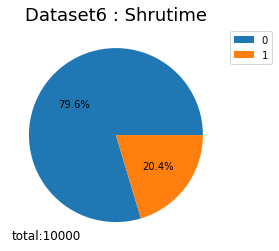

In [83]:
plt.pie(data6["Exited"].value_counts(), textprops = {"fontsize" : 10},autopct = "%1.1f%%")  
plt.legend(bbox_to_anchor=(1, 1), loc='upper left',labels =data6["Exited"].value_counts().index) 
plt.title('Dataset6 : Shrutime', {"fontsize" : 18})
plt.text(-1.2, -1.2, "total:10000",{"fontsize" : 12 })
plt.show()

In [84]:
data6.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [85]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data6['Surname']=labelencoder.fit_transform(data6['Surname'])
data6['Geography']=labelencoder.fit_transform(data6['Geography'])
data6['Gender']=labelencoder.fit_transform(data6['Gender'])

In [86]:
data6.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [87]:
#切割資料，train:test=0.75:0.25
train_data,test_data,train_labels,test_labels=train_test_split(data6,data6['Exited'],test_size=0.25)
print('Size of training dataset:', train_data.shape)
print('Size of testing dataset:', test_data.shape)

Size of training dataset: (7500, 14)
Size of testing dataset: (2500, 14)


In [88]:
from sklearn.neighbors import KNeighborsClassifier
# Create the model
knn = KNeighborsClassifier(n_neighbors=5)

# Learn on the train subset
knn.fit(train_data, train_labels)

# Predict on the testing subset
predicted = knn.predict(test_data)

# Calculate accuracy
accuracy = knn.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

Accuracy of testing dataset:  0.7672


In [89]:
from sklearn.linear_model import LogisticRegression
# Create the model
lm = LogisticRegression(solver="lbfgs")

# Learn on the train subset
lm.fit(train_data, train_labels)

# Predict on the testing subset
predicted =lm.predict(test_data)

# Calculate accuracy
accuracy = lm.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

Accuracy of testing dataset:  0.7968


In [90]:
from sklearn.ensemble import RandomForestRegressor
# Create the model
RF = RandomForestRegressor()

# Learn on the train subset
RF.fit(train_data, train_labels)

# Predict on the testing subset
predicted =RF.predict(test_data)

# Calculate accuracy
accuracy = RF.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

Accuracy of testing dataset:  1.0


In [91]:
from sklearn.neural_network import MLPClassifier
# Create the model
MLP = MLPClassifier()

# Learn the digits on the train subset
MLP.fit(train_data, train_labels)

# Predict the value of the digit on the testing subset
predicted = MLP.predict(test_data)

# Calculate accuracy
accuracy =  MLP.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

Accuracy of testing dataset:  0.7968


In [92]:
from sklearn import svm
# Create the model
svc = svm.SVC()

# Learn the digits on the train subset
svc.fit(train_data, train_labels)

# Predict the value of the digit on the testing subset
predicted = svc.predict(test_data)

# Calculate accuracy
accuracy = svc.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

Accuracy of testing dataset:  0.7968


In [93]:
from xgboost import XGBClassifier
# Create the model
XGB = XGBClassifier()

# Learn the digits on the train subset
XGB.fit(train_data, train_labels)

# Predict the value of the digit on the testing subset
predicted = XGB.predict(test_data)

# Calculate accuracy
accuracy = XGB.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

[23:56:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of testing dataset:  1.0


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [94]:
from catboost import CatBoostClassifier
# Create the model
CAT = CatBoostClassifier(iterations=10,
              learning_rate=1,
              depth=2,
              loss_function='MultiClass')

# Learn the digits on the train subset
CAT.fit(train_data, train_labels)

# Predict the value of the digit on the testing subset
predicted = CAT.predict(test_data)

# Calculate accuracy
accuracy = CAT.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

0:	learn: 0.1276904	total: 1.94ms	remaining: 17.5ms
1:	learn: 0.0431548	total: 3.81ms	remaining: 15.2ms
2:	learn: 0.0156862	total: 5.75ms	remaining: 13.4ms
3:	learn: 0.0059991	total: 7.55ms	remaining: 11.3ms
4:	learn: 0.0024683	total: 9.36ms	remaining: 9.36ms
5:	learn: 0.0011452	total: 11.1ms	remaining: 7.42ms
6:	learn: 0.0005990	total: 12.9ms	remaining: 5.54ms
7:	learn: 0.0003699	total: 14.7ms	remaining: 3.68ms
8:	learn: 0.0002277	total: 16.4ms	remaining: 1.82ms
9:	learn: 0.0001798	total: 18.1ms	remaining: 0us
Accuracy of testing dataset:  1.0


In [95]:
import lightgbm as lgb
# Create the model
LGBM = lgb.LGBMClassifier(application='multiclass', boosting='gbdt', learning_rate=0.1, max_depth=-5, feature_fraction=0.5, random_state=42)

# Learn the digits on the train subset
LGBM.fit(train_data, train_labels)

# Predict the value of the digit on the testing subset
predicted = LGBM.predict(test_data)

# Calculate accuracy
accuracy =LGBM.score(test_data,test_labels)
print('Accuracy of testing dataset: ', accuracy)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
Accuracy of testing dataset:  1.0


# 創建function

In [96]:
data1=pd.read_csv("income_evaluation.csv")
data2_train=pd.read_csv("arcene_train.data",sep=" ",header=None)
data2_valid=pd.read_csv("arcene_valid.data",sep=" ",header=None)
data2_train_label=pd.read_csv("arcene_train.labels",sep=" ",header=None)
data2_valid_label=pd.read_csv("arcene_valid.labels",sep=" ",header=None)
data2_label=data2_train_label.append(data2_valid_label)
data2_all=data2_train.append(data2_valid).dropna(axis='columns')
data2=pd.concat([data2_all,data2_label],axis=1)
data2.columns=[x for x in range(0,10001)]
data3=pd.read_csv(".\\bank\\bank_all.csv")
data4=pd.read_csv("Telco-Customer-Churn.csv")
data5=pd.read_csv("online_shoppers_intention.csv")
data6=pd.read_csv("Churn_Modelling.csv")

In [97]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [98]:
# change the type of data 
def data_type_change(data):
    columns=data.columns
    for one in columns:
        if (data[one].dtypes=="O")or(data[one].dtypes=='bool'):
            labelencoder = LabelEncoder()
            data[one]=labelencoder.fit_transform(data[one])
    return data

In [99]:
def train_test_spliter(data,Supervised_or_not,test_ratio):
    if Supervised_or_not is True:
        train_data,test_data,train_labels,test_labels=train_test_split(data,data.iloc[:,-1],test_size=test_ratio)
    else:
        train=data.sample(n=50,replace=False)
        test=data.drop(train.index)
        train_data=train.iloc[:,:-2]
        train_labels=train.iloc[:,-1]
        test_data=test.iloc[:,:-2]
        test_labels=test.iloc[:,-1]
    return train_data,test_data,train_labels,test_labels

In [100]:
def set_model_accuracy(data,Supervised_or_not,test_ratio):
    #split data
    train_data,test_data,train_labels,test_labels=train_test_spliter(data,Supervised_or_not,test_ratio)
    #set model1
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(train_data, train_labels)
    accuracy_knn = metrics.accuracy_score(test_labels, knn.predict(test_data))
    #set model2
    lm = LogisticRegression(solver="lbfgs")
    lm.fit(train_data, train_labels)
    accuracy_lm = metrics.accuracy_score(test_labels, lm.predict(test_data))
    #set model3
    RF = RandomForestClassifier(n_estimators=100, random_state=0)
    RF.fit(train_data, train_labels)
    accuracy_RF = metrics.accuracy_score(test_labels, RF.predict(test_data))
    #set model4
    MLP = MLPClassifier()
    MLP.fit(train_data, train_labels)
    accuracy_MLP = metrics.accuracy_score(test_labels,MLP.predict(test_data))
    #set model5
    svc = svm.SVC()
    svc.fit(train_data, train_labels)
    accuracy_svm = metrics.accuracy_score(test_labels,svc.predict(test_data))
    #set model6
    XGB = XGBClassifier()
    XGB.fit(train_data, train_labels)
    accuracy_XGB = metrics.accuracy_score(test_labels,XGB.predict(test_data))
    #set model7
    CAT = CatBoostClassifier(iterations=10,
                  learning_rate=1,
                  depth=2,
                  loss_function='MultiClass')
    CAT.fit(train_data, train_labels)
    accuracy_CAT = metrics.accuracy_score(test_labels,CAT.predict(test_data))
    #set model8
    LGBM = lgb.LGBMClassifier(application='multiclass', boosting='gbdt', learning_rate=0.1, max_depth=-5, feature_fraction=0.5, random_state=42)
    LGBM.fit(train_data, train_labels)
    accuracy_LGBM = metrics.accuracy_score(test_labels,LGBM.predict(test_data))

    # create accuracy_table
    accuracy_table=pd.DataFrame([accuracy_knn,accuracy_lm,accuracy_RF,accuracy_MLP,accuracy_svm,accuracy_XGB,accuracy_CAT,accuracy_LGBM],
                                index=["KNN","LM","RF","MLP","SVM","XGB","CAT","LGBM"],columns=["Accuracy"])
    return accuracy_table

In [101]:
def set_model_AUC(data,Supervised_or_not,test_ratio):
    #split data
    train_data,test_data,train_labels,test_labels=train_test_spliter(data,Supervised_or_not,test_ratio)
    #set model1
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(train_data, train_labels)
    fpr, tpr, thresholds = metrics.roc_curve(test_labels, knn.predict(test_data))
    auc.knn =metrics.auc(fpr, tpr)
    #set model2
    lm = LogisticRegression(solver="lbfgs")
    lm.fit(train_data, train_labels)
    fpr, tpr, thresholds = metrics.roc_curve(test_labels, lm.predict(test_data))
    auc.lm =metrics.auc(fpr, tpr)
    #set model3
    RF = RandomForestClassifier(n_estimators=100, random_state=0)
    RF.fit(train_data, train_labels)
    fpr, tpr, thresholds = metrics.roc_curve(test_labels, RF.predict(test_data))
    auc.RF =metrics.auc(fpr, tpr)
    #set model4
    MLP = MLPClassifier()
    MLP.fit(train_data, train_labels)
    fpr, tpr, thresholds = metrics.roc_curve(test_labels, MLP.predict(test_data))
    auc.MLP =metrics.auc(fpr, tpr)
    #set model5
    svc = svm.SVC()
    svc.fit(train_data, train_labels)
    fpr, tpr, thresholds = metrics.roc_curve(test_labels, svc.predict(test_data))
    auc.svm =metrics.auc(fpr, tpr)
    #set model6
    XGB = XGBClassifier()
    XGB.fit(train_data, train_labels)
    fpr, tpr, thresholds = metrics.roc_curve(test_labels, XGB.predict(test_data))
    auc.XGB =metrics.auc(fpr, tpr)
    #set model7
    CAT = CatBoostClassifier(iterations=10,
                  learning_rate=1,
                  depth=2,
                  loss_function='MultiClass')
    CAT.fit(train_data, train_labels)
    fpr, tpr, thresholds = metrics.roc_curve(test_labels, CAT.predict(test_data))
    auc.CAT =metrics.auc(fpr, tpr)
    #set model8
    LGBM = lgb.LGBMClassifier(application='multiclass', boosting='gbdt', learning_rate=0.1, max_depth=-5, feature_fraction=0.5, random_state=42)
    LGBM.fit(train_data, train_labels)
    fpr, tpr, thresholds = metrics.roc_curve(test_labels, LGBM.predict(test_data))
    auc.LGBM =metrics.auc(fpr, tpr)

    # create accuracy_table
    AUC_table=pd.DataFrame([auc.knn,auc.lm,auc.RF,auc.MLP,auc.svm,auc.XGB,auc.CAT,auc.LGBM],index=["KNN","LM","RF","MLP","SVM","XGB","CAT","LGBM"],columns=["AUC"])
    return AUC_table

# supervised learning

In [102]:
data_1=data_type_change(data1)
data_2=data2
data_3=data_type_change(data3)
data_4=data_type_change(data4)
data_5=data_type_change(data5)
data_6=data_type_change(data6)
accuracy_table_all=pd.DataFrame()
for one_data in [data_1,data_2,data_3,data_4,data_5,data_6]:
    accuracy_table_in_dataset=pd.DataFrame()
    for time in range(0,5) :
        accuracy_table_in_dataset=pd.concat([accuracy_table_in_dataset,set_model_accuracy(one_data,True,0.25)],axis=1)
    accuracy_table_all=pd.concat([accuracy_table_all,accuracy_table_in_dataset.mean(axis=1)],axis=1)

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[23:57:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1271623	total: 3.88ms	remaining: 34.9ms
1:	learn: 0.0427476	total: 7.39ms	remaining: 29.6ms
2:	learn: 0.0153461	total: 10.9ms	remaining: 25.5ms
3:	learn: 0.0056775	total: 14.4ms	remaining: 21.7ms
4:	learn: 0.0021590	total: 17.9ms	remaining: 17.9ms
5:	learn: 0.0008761	total: 21.9ms	remaining: 14.6ms
6:	learn: 0.0003980	total: 25.4ms	remaining: 10.9ms
7:	learn: 0.0001944	total: 29.2ms	remaining: 7.29ms
8:	learn: 0.0001126	total: 32.5ms	remaining: 3.62ms
9:	learn: 0.0000759	total: 35.8ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytre

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:57:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1271623	total: 3.58ms	remaining: 32.2ms
1:	learn: 0.0427476	total: 7.26ms	remaining: 29ms
2:	learn: 0.0153454	total: 10.8ms	remaining: 25.1ms
3:	learn: 0.0056772	total: 14.4ms	remaining: 21.5ms
4:	learn: 0.0021588	total: 17.8ms	remaining: 17.8ms
5:	learn: 0.0008761	total: 21.7ms	remaining: 14.4ms
6:	learn: 0.0003980	total: 25.3ms	remaining: 10.8ms
7:	learn: 0.0001943	total: 28.8ms	remaining: 7.2ms
8:	learn: 0.0001125	total: 32.4ms	remaining: 3.6ms
9:	learn: 0.0000758	total: 37.1ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[23:57:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1271623	total: 3.63ms	remaining: 32.7ms
1:	learn: 0.0427476	total: 7.74ms	remaining: 31ms
2:	learn: 0.0153450	total: 12.4ms	remaining: 28.9ms
3:	learn: 0.0056771	total: 15.8ms	remaining: 23.8ms
4:	learn: 0.0021588	total: 19.3ms	remaining: 19.3ms
5:	learn: 0.0008761	total: 22.7ms	remaining: 15.1ms
6:	learn: 0.0003980	total: 26.1ms	remaining: 11.2ms
7:	learn: 0.0001943	total: 29.5ms	remaining: 7.37ms
8:	learn: 0.0001125	total: 33ms	remaining: 3.66ms
9:	learn: 0.0000757	total: 36.6ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:58:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1271623	total: 3.35ms	remaining: 30.2ms
1:	learn: 0.0427476	total: 7.4ms	remaining: 29.6ms
2:	learn: 0.0153458	total: 11.1ms	remaining: 26ms
3:	learn: 0.0056774	total: 14.6ms	remaining: 21.9ms
4:	learn: 0.0021588	total: 18.1ms	remaining: 18.1ms
5:	learn: 0.0008761	total: 21.8ms	remaining: 14.5ms
6:	learn: 0.0003980	total: 25.8ms	remaining: 11ms
7:	learn: 0.0001943	total: 29.5ms	remaining: 7.38ms
8:	learn: 0.0001126	total: 33ms	remaining: 3.67ms
9:	learn: 0.0000758	total: 36.7ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 w

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:58:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1271623	total: 4ms	remaining: 36ms
1:	learn: 0.0427476	total: 7.8ms	remaining: 31.2ms
2:	learn: 0.0153461	total: 11.4ms	remaining: 26.5ms
3:	learn: 0.0056775	total: 15.2ms	remaining: 22.8ms
4:	learn: 0.0021585	total: 18.8ms	remaining: 18.8ms
5:	learn: 0.0008760	total: 22.3ms	remaining: 14.8ms
6:	learn: 0.0003980	total: 25.5ms	remaining: 10.9ms
7:	learn: 0.0001941	total: 28.7ms	remaining: 7.18ms
8:	learn: 0.0001123	total: 32.1ms	remaining: 3.56ms
9:	learn: 0.0000756	total: 35.5ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[23:58:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1632236	total: 99.8ms	remaining: 898ms
1:	learn: 0.0667293	total: 145ms	remaining: 580ms
2:	learn: 0.0342985	total: 191ms	remaining: 446ms
3:	learn: 0.0212003	total: 241ms	remaining: 361ms
4:	learn: 0.0149109	total: 294ms	remaining: 294ms
5:	learn: 0.0108587	total: 355ms	remaining: 237ms
6:	learn: 0.0083644	total: 404ms	remaining: 173ms
7:	learn: 0.0067100	total: 453ms	remaining: 113ms
8:	learn: 0.0057686	total: 503ms	remaining: 55.9ms
9:	learn: 0.0049037	total: 553ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ign

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[23:58:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1639706	total: 87.6ms	remaining: 789ms
1:	learn: 0.0681062	total: 134ms	remaining: 535ms
2:	learn: 0.0342572	total: 181ms	remaining: 423ms
3:	learn: 0.0212757	total: 230ms	remaining: 345ms
4:	learn: 0.0147863	total: 289ms	remaining: 289ms
5:	learn: 0.0108239	total: 351ms	remaining: 234ms
6:	learn: 0.0085927	total: 399ms	remaining: 171ms
7:	learn: 0.0070646	total: 448ms	remaining: 112ms
8:	learn: 0.0060064	total: 499ms	remaining: 55.4ms
9:	learn: 0.0052279	total: 556ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ign

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[23:58:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1633913	total: 176ms	remaining: 1.58s
1:	learn: 0.0633135	total: 246ms	remaining: 985ms
2:	learn: 0.0303703	total: 321ms	remaining: 749ms
3:	learn: 0.0193422	total: 429ms	remaining: 643ms
4:	learn: 0.0126944	total: 507ms	remaining: 507ms
5:	learn: 0.0093055	total: 558ms	remaining: 372ms
6:	learn: 0.0071152	total: 611ms	remaining: 262ms
7:	learn: 0.0060030	total: 666ms	remaining: 167ms
8:	learn: 0.0052237	total: 727ms	remaining: 80.8ms
9:	learn: 0.0045871	total: 786ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be igno

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[23:59:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1609924	total: 89.6ms	remaining: 806ms
1:	learn: 0.0681681	total: 152ms	remaining: 608ms
2:	learn: 0.0361408	total: 250ms	remaining: 582ms
3:	learn: 0.0222877	total: 341ms	remaining: 512ms
4:	learn: 0.0154552	total: 406ms	remaining: 406ms
5:	learn: 0.0116941	total: 468ms	remaining: 312ms
6:	learn: 0.0092523	total: 520ms	remaining: 223ms
7:	learn: 0.0072911	total: 585ms	remaining: 146ms
8:	learn: 0.0060234	total: 670ms	remaining: 74.5ms
9:	learn: 0.0051413	total: 805ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ign

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[23:59:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1632355	total: 83ms	remaining: 747ms
1:	learn: 0.0692554	total: 131ms	remaining: 524ms
2:	learn: 0.0363653	total: 179ms	remaining: 418ms
3:	learn: 0.0225473	total: 230ms	remaining: 345ms
4:	learn: 0.0147863	total: 294ms	remaining: 294ms
5:	learn: 0.0108031	total: 351ms	remaining: 234ms
6:	learn: 0.0086588	total: 406ms	remaining: 174ms
7:	learn: 0.0071938	total: 469ms	remaining: 117ms
8:	learn: 0.0061425	total: 523ms	remaining: 58.1ms
9:	learn: 0.0053294	total: 593ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignor

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:00:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1270967	total: 5.09ms	remaining: 45.8ms
1:	learn: 0.0426955	total: 9.35ms	remaining: 37.4ms
2:	learn: 0.0153144	total: 13.7ms	remaining: 32ms
3:	learn: 0.0056271	total: 18ms	remaining: 27.1ms
4:	learn: 0.0021107	total: 22.2ms	remaining: 22.2ms
5:	learn: 0.0008319	total: 26.9ms	remaining: 17.9ms
6:	learn: 0.0003593	total: 31.2ms	remaining: 13.4ms
7:	learn: 0.0001722	total: 35.3ms	remaining: 8.83ms
8:	learn: 0.0000975	total: 39.5ms	remaining: 4.38ms
9:	learn: 0.0000643	total: 43.6ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:00:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1270967	total: 5.19ms	remaining: 46.8ms
1:	learn: 0.0426954	total: 10.6ms	remaining: 42.6ms
2:	learn: 0.0153143	total: 15.3ms	remaining: 35.7ms
3:	learn: 0.0056273	total: 19.8ms	remaining: 29.7ms
4:	learn: 0.0021112	total: 24ms	remaining: 24ms
5:	learn: 0.0008322	total: 28ms	remaining: 18.6ms
6:	learn: 0.0003593	total: 31.9ms	remaining: 13.7ms
7:	learn: 0.0001722	total: 36.1ms	remaining: 9.03ms
8:	learn: 0.0000975	total: 40.2ms	remaining: 4.47ms
9:	learn: 0.0000643	total: 44.4ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:01:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1270967	total: 6.94ms	remaining: 62.5ms
1:	learn: 0.0426955	total: 11.1ms	remaining: 44.5ms
2:	learn: 0.0153144	total: 15.6ms	remaining: 36.3ms
3:	learn: 0.0056277	total: 19.6ms	remaining: 29.5ms
4:	learn: 0.0021108	total: 24.3ms	remaining: 24.3ms
5:	learn: 0.0008312	total: 28.4ms	remaining: 19ms
6:	learn: 0.0003589	total: 32.5ms	remaining: 13.9ms
7:	learn: 0.0001748	total: 36.6ms	remaining: 9.14ms
8:	learn: 0.0001004	total: 40.5ms	remaining: 4.5ms
9:	learn: 0.0000668	total: 44.8ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:01:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1270967	total: 5.16ms	remaining: 46.4ms
1:	learn: 0.0426954	total: 9.43ms	remaining: 37.7ms
2:	learn: 0.0153143	total: 14.1ms	remaining: 32.9ms
3:	learn: 0.0056279	total: 18.6ms	remaining: 27.9ms
4:	learn: 0.0021113	total: 22.7ms	remaining: 22.7ms
5:	learn: 0.0008322	total: 26.7ms	remaining: 17.8ms
6:	learn: 0.0003594	total: 30.8ms	remaining: 13.2ms
7:	learn: 0.0001750	total: 34.9ms	remaining: 8.73ms
8:	learn: 0.0001005	total: 39ms	remaining: 4.33ms
9:	learn: 0.0000669	total: 43.4ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:02:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1270967	total: 5.13ms	remaining: 46.2ms
1:	learn: 0.0426954	total: 10.1ms	remaining: 40.6ms
2:	learn: 0.0153143	total: 16.1ms	remaining: 37.5ms
3:	learn: 0.0056273	total: 20.8ms	remaining: 31.2ms
4:	learn: 0.0021109	total: 24.9ms	remaining: 24.9ms
5:	learn: 0.0008319	total: 29.5ms	remaining: 19.6ms
6:	learn: 0.0003592	total: 33.5ms	remaining: 14.4ms
7:	learn: 0.0001722	total: 37.6ms	remaining: 9.39ms
8:	learn: 0.0000975	total: 41.6ms	remaining: 4.63ms
9:	learn: 0.0000643	total: 46.3ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytre

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:02:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1280104	total: 1.48ms	remaining: 13.3ms
1:	learn: 0.0433946	total: 2.74ms	remaining: 11ms
2:	learn: 0.0159272	total: 3.97ms	remaining: 9.27ms
3:	learn: 0.0062045	total: 5.12ms	remaining: 7.68ms
4:	learn: 0.0026119	total: 6.36ms	remaining: 6.36ms
5:	learn: 0.0012605	total: 7.58ms	remaining: 5.05ms
6:	learn: 0.0007162	total: 8.84ms	remaining: 3.79ms
7:	learn: 0.0004727	total: 10ms	remaining: 2.51ms
8:	learn: 0.0003454	total: 11.5ms	remaining: 1.28ms
9:	learn: 0.0002699	total: 12.8ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:02:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1280103	total: 1.46ms	remaining: 13.1ms
1:	learn: 0.0433952	total: 2.85ms	remaining: 11.4ms
2:	learn: 0.0159273	total: 4.08ms	remaining: 9.51ms
3:	learn: 0.0062042	total: 5.31ms	remaining: 7.96ms
4:	learn: 0.0026136	total: 6.61ms	remaining: 6.61ms
5:	learn: 0.0012625	total: 7.88ms	remaining: 5.25ms
6:	learn: 0.0007165	total: 9.24ms	remaining: 3.96ms
7:	learn: 0.0004734	total: 10.5ms	remaining: 2.63ms
8:	learn: 0.0003461	total: 11.8ms	remaining: 1.31ms
9:	learn: 0.0002705	total: 13ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:02:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1280104	total: 1.48ms	remaining: 13.3ms
1:	learn: 0.0433954	total: 2.93ms	remaining: 11.7ms
2:	learn: 0.0159274	total: 4.23ms	remaining: 9.88ms
3:	learn: 0.0062043	total: 5.57ms	remaining: 8.35ms
4:	learn: 0.0026141	total: 6.88ms	remaining: 6.88ms
5:	learn: 0.0012629	total: 8.18ms	remaining: 5.45ms
6:	learn: 0.0007318	total: 9.43ms	remaining: 4.04ms
7:	learn: 0.0004772	total: 10.7ms	remaining: 2.67ms
8:	learn: 0.0003464	total: 11.9ms	remaining: 1.32ms
9:	learn: 0.0002697	total: 13.1ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytre

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:02:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1280104	total: 1.59ms	remaining: 14.3ms
1:	learn: 0.0433952	total: 3.12ms	remaining: 12.5ms
2:	learn: 0.0159274	total: 4.5ms	remaining: 10.5ms
3:	learn: 0.0062045	total: 5.73ms	remaining: 8.6ms
4:	learn: 0.0026135	total: 6.93ms	remaining: 6.93ms
5:	learn: 0.0012623	total: 8.19ms	remaining: 5.46ms
6:	learn: 0.0007169	total: 9.41ms	remaining: 4.04ms
7:	learn: 0.0004735	total: 10.8ms	remaining: 2.7ms
8:	learn: 0.0003461	total: 12.1ms	remaining: 1.34ms
9:	learn: 0.0002705	total: 13.3ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:02:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1280104	total: 1.41ms	remaining: 12.7ms
1:	learn: 0.0433953	total: 2.89ms	remaining: 11.6ms
2:	learn: 0.0159274	total: 4.27ms	remaining: 9.97ms
3:	learn: 0.0062044	total: 5.59ms	remaining: 8.38ms
4:	learn: 0.0026139	total: 6.87ms	remaining: 6.87ms
5:	learn: 0.0012627	total: 8.32ms	remaining: 5.54ms
6:	learn: 0.0007173	total: 9.61ms	remaining: 4.12ms
7:	learn: 0.0004738	total: 10.9ms	remaining: 2.72ms
8:	learn: 0.0003464	total: 12.2ms	remaining: 1.35ms
9:	learn: 0.0002708	total: 13.6ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytre

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:02:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1275464	total: 2.7ms	remaining: 24.3ms
1:	learn: 0.0430443	total: 4.88ms	remaining: 19.5ms
2:	learn: 0.0155052	total: 6.89ms	remaining: 16.1ms
3:	learn: 0.0058246	total: 8.89ms	remaining: 13.3ms
4:	learn: 0.0023427	total: 11ms	remaining: 11ms
5:	learn: 0.0010255	total: 13.1ms	remaining: 8.71ms
6:	learn: 0.0004767	total: 15.1ms	remaining: 6.45ms
7:	learn: 0.0002933	total: 17.1ms	remaining: 4.27ms
8:	learn: 0.0001852	total: 19.3ms	remaining: 2.15ms
9:	learn: 0.0001312	total: 21.4ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:02:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1275464	total: 2.28ms	remaining: 20.6ms
1:	learn: 0.0430443	total: 4.39ms	remaining: 17.6ms
2:	learn: 0.0155032	total: 6.39ms	remaining: 14.9ms
3:	learn: 0.0058250	total: 8.41ms	remaining: 12.6ms
4:	learn: 0.0023431	total: 10.4ms	remaining: 10.4ms
5:	learn: 0.0010247	total: 12.6ms	remaining: 8.41ms
6:	learn: 0.0004766	total: 14.9ms	remaining: 6.39ms
7:	learn: 0.0002667	total: 16.9ms	remaining: 4.24ms
8:	learn: 0.0001746	total: 19ms	remaining: 2.12ms
9:	learn: 0.0001277	total: 21ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:02:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1275464	total: 2.17ms	remaining: 19.5ms
1:	learn: 0.0430443	total: 4.37ms	remaining: 17.5ms
2:	learn: 0.0155976	total: 6.45ms	remaining: 15.1ms
3:	learn: 0.0058656	total: 8.44ms	remaining: 12.7ms
4:	learn: 0.0023580	total: 10.4ms	remaining: 10.4ms
5:	learn: 0.0010309	total: 12.6ms	remaining: 8.41ms
6:	learn: 0.0004791	total: 14.6ms	remaining: 6.27ms
7:	learn: 0.0002877	total: 16.7ms	remaining: 4.19ms
8:	learn: 0.0001860	total: 18.8ms	remaining: 2.09ms
9:	learn: 0.0001332	total: 20.8ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytre

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:02:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1275464	total: 2.19ms	remaining: 19.8ms
1:	learn: 0.0430443	total: 4.28ms	remaining: 17.1ms
2:	learn: 0.0155009	total: 6.42ms	remaining: 15ms
3:	learn: 0.0058212	total: 8.46ms	remaining: 12.7ms
4:	learn: 0.0023410	total: 10.6ms	remaining: 10.6ms
5:	learn: 0.0010242	total: 12.6ms	remaining: 8.38ms
6:	learn: 0.0004764	total: 14.6ms	remaining: 6.26ms
7:	learn: 0.0002934	total: 16.5ms	remaining: 4.13ms
8:	learn: 0.0001847	total: 18.5ms	remaining: 2.05ms
9:	learn: 0.0001309	total: 20.5ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:02:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1275464	total: 2.06ms	remaining: 18.5ms
1:	learn: 0.0430443	total: 4.21ms	remaining: 16.8ms
2:	learn: 0.0155009	total: 6.27ms	remaining: 14.6ms
3:	learn: 0.0058256	total: 8.31ms	remaining: 12.5ms
4:	learn: 0.0023434	total: 10.2ms	remaining: 10.2ms
5:	learn: 0.0010260	total: 12.3ms	remaining: 8.17ms
6:	learn: 0.0004773	total: 14.2ms	remaining: 6.1ms
7:	learn: 0.0002938	total: 16.2ms	remaining: 4.06ms
8:	learn: 0.0001855	total: 18.2ms	remaining: 2.03ms
9:	learn: 0.0001385	total: 20.2ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:03:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1276904	total: 1.81ms	remaining: 16.3ms
1:	learn: 0.0431547	total: 3.49ms	remaining: 14ms
2:	learn: 0.0156821	total: 5.06ms	remaining: 11.8ms
3:	learn: 0.0059975	total: 6.64ms	remaining: 9.96ms
4:	learn: 0.0024677	total: 8.25ms	remaining: 8.25ms
5:	learn: 0.0011451	total: 9.8ms	remaining: 6.53ms
6:	learn: 0.0006005	total: 11.5ms	remaining: 4.93ms
7:	learn: 0.0003707	total: 13.2ms	remaining: 3.3ms
8:	learn: 0.0002282	total: 14.7ms	remaining: 1.63ms
9:	learn: 0.0001802	total: 16.1ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:03:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1276904	total: 1.85ms	remaining: 16.6ms
1:	learn: 0.0431548	total: 3.52ms	remaining: 14.1ms
2:	learn: 0.0156826	total: 5.22ms	remaining: 12.2ms
3:	learn: 0.0059979	total: 6.87ms	remaining: 10.3ms
4:	learn: 0.0024679	total: 8.45ms	remaining: 8.45ms
5:	learn: 0.0011450	total: 10.1ms	remaining: 6.75ms
6:	learn: 0.0005997	total: 11.7ms	remaining: 5.03ms
7:	learn: 0.0003700	total: 13.3ms	remaining: 3.33ms
8:	learn: 0.0002278	total: 15ms	remaining: 1.66ms
9:	learn: 0.0001800	total: 16.6ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:03:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1276904	total: 1.74ms	remaining: 15.7ms
1:	learn: 0.0431548	total: 3.4ms	remaining: 13.6ms
2:	learn: 0.0156842	total: 5.02ms	remaining: 11.7ms
3:	learn: 0.0059983	total: 6.67ms	remaining: 10ms
4:	learn: 0.0024680	total: 8.46ms	remaining: 8.46ms
5:	learn: 0.0011447	total: 10.3ms	remaining: 6.86ms
6:	learn: 0.0005999	total: 12ms	remaining: 5.13ms
7:	learn: 0.0003702	total: 13.7ms	remaining: 3.42ms
8:	learn: 0.0002279	total: 15.3ms	remaining: 1.7ms
9:	learn: 0.0001799	total: 17ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 wi

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:03:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1276904	total: 10.8ms	remaining: 96.9ms
1:	learn: 0.0431547	total: 12.8ms	remaining: 51.2ms
2:	learn: 0.0156815	total: 14.5ms	remaining: 33.9ms
3:	learn: 0.0059972	total: 16.4ms	remaining: 24.5ms
4:	learn: 0.0024675	total: 18.1ms	remaining: 18.1ms
5:	learn: 0.0011440	total: 19.8ms	remaining: 13.2ms
6:	learn: 0.0005988	total: 21.5ms	remaining: 9.22ms
7:	learn: 0.0003691	total: 23.2ms	remaining: 5.81ms
8:	learn: 0.0002273	total: 24.9ms	remaining: 2.77ms
9:	learn: 0.0001796	total: 26.5ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytre

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [103]:
accuracy_table_all.columns=["Income","Arcene","Bank","BlastChar","Shopper","SHrutime"]
accuracy_table_all

,Income,Arcene,Bank,BlastChar,Shopper,SHrutime
KNN,0.772338,0.816,0.880563,0.692788,0.858644,0.75952
LM,0.789584,0.868,0.915881,0.992618,0.884009,0.79232
RF,1.000000,0.820,1.000000,1.000000,1.000000,1.00000
MLP,0.787053,0.680,0.988764,0.922658,0.976776,0.75048
SVM,0.793637,0.700,0.882721,0.740148,0.840156,0.79232
XGB,1.000000,1.000,1.000000,1.000000,1.000000,1.00000
CAT,1.000000,1.000,1.000000,1.000000,1.000000,1.00000
LGBM,1.000000,1.000,1.000000,1.000000,1.000000,1.00000


In [104]:
data_1=data_type_change(data1)
data_2=data2
data_3=data_type_change(data3)
data_4=data_type_change(data4)
data_5=data_type_change(data5)
data_6=data_type_change(data6)
AUC_table_all=pd.DataFrame()
for one_data in [data_1,data_2,data_3,data_4,data_5,data_6]:
    AUC_table_in_dataset=pd.DataFrame()
    for time in range(0,5) :
        AUC_table_in_dataset=pd.concat([AUC_table_in_dataset,set_model_AUC(one_data,True,0.25)],axis=1)
    AUC_table_all=pd.concat([AUC_table_all,AUC_table_in_dataset.mean(axis=1)],axis=1)

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:03:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1271623	total: 3.72ms	remaining: 33.5ms
1:	learn: 0.0427476	total: 7.58ms	remaining: 30.3ms
2:	learn: 0.0153457	total: 11.3ms	remaining: 26.5ms
3:	learn: 0.0056774	total: 14.9ms	remaining: 22.3ms
4:	learn: 0.0021587	total: 18.3ms	remaining: 18.3ms
5:	learn: 0.0008761	total: 22.2ms	remaining: 14.8ms
6:	learn: 0.0003980	total: 25.7ms	remaining: 11ms
7:	learn: 0.0001944	total: 29.4ms	remaining: 7.36ms
8:	learn: 0.0001126	total: 33.2ms	remaining: 3.69ms
9:	learn: 0.0000759	total: 36.6ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:03:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1271623	total: 7.97ms	remaining: 71.7ms
1:	learn: 0.0427476	total: 16.4ms	remaining: 65.4ms
2:	learn: 0.0153467	total: 20.6ms	remaining: 48.2ms
3:	learn: 0.0056777	total: 25.9ms	remaining: 38.9ms
4:	learn: 0.0021586	total: 30ms	remaining: 30ms
5:	learn: 0.0008760	total: 34.2ms	remaining: 22.8ms
6:	learn: 0.0003980	total: 38.3ms	remaining: 16.4ms
7:	learn: 0.0001941	total: 43.3ms	remaining: 10.8ms
8:	learn: 0.0001124	total: 47.4ms	remaining: 5.26ms
9:	learn: 0.0000756	total: 51.9ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:04:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1271623	total: 3.79ms	remaining: 34.1ms
1:	learn: 0.0427476	total: 7.4ms	remaining: 29.6ms
2:	learn: 0.0153454	total: 10.9ms	remaining: 25.5ms
3:	learn: 0.0056772	total: 14.5ms	remaining: 21.8ms
4:	learn: 0.0021586	total: 18.2ms	remaining: 18.2ms
5:	learn: 0.0008760	total: 21.9ms	remaining: 14.6ms
6:	learn: 0.0003980	total: 25.6ms	remaining: 11ms
7:	learn: 0.0001942	total: 29.1ms	remaining: 7.28ms
8:	learn: 0.0001125	total: 32.5ms	remaining: 3.61ms
9:	learn: 0.0000757	total: 36ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:04:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1271623	total: 4.22ms	remaining: 38ms
1:	learn: 0.0427476	total: 7.86ms	remaining: 31.4ms
2:	learn: 0.0153450	total: 11.3ms	remaining: 26.3ms
3:	learn: 0.0056771	total: 15ms	remaining: 22.5ms
4:	learn: 0.0021587	total: 18.6ms	remaining: 18.6ms
5:	learn: 0.0008761	total: 22.5ms	remaining: 15ms
6:	learn: 0.0003980	total: 26.2ms	remaining: 11.2ms
7:	learn: 0.0001944	total: 29.8ms	remaining: 7.44ms
8:	learn: 0.0001126	total: 33.4ms	remaining: 3.71ms
9:	learn: 0.0000759	total: 37.1ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:04:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1271623	total: 4.14ms	remaining: 37.3ms
1:	learn: 0.0427476	total: 7.61ms	remaining: 30.5ms
2:	learn: 0.0153450	total: 11.1ms	remaining: 25.9ms
3:	learn: 0.0056771	total: 14.3ms	remaining: 21.4ms
4:	learn: 0.0021589	total: 18.1ms	remaining: 18.1ms
5:	learn: 0.0008762	total: 21.6ms	remaining: 14.4ms
6:	learn: 0.0003981	total: 24.8ms	remaining: 10.6ms
7:	learn: 0.0001943	total: 28.2ms	remaining: 7.04ms
8:	learn: 0.0001125	total: 31.5ms	remaining: 3.5ms
9:	learn: 0.0000758	total: 34.8ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:04:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1629448	total: 102ms	remaining: 918ms
1:	learn: 0.0696726	total: 170ms	remaining: 678ms
2:	learn: 0.0366559	total: 242ms	remaining: 564ms
3:	learn: 0.0218941	total: 327ms	remaining: 491ms
4:	learn: 0.0153147	total: 386ms	remaining: 386ms
5:	learn: 0.0110621	total: 440ms	remaining: 294ms
6:	learn: 0.0086922	total: 496ms	remaining: 212ms
7:	learn: 0.0072650	total: 554ms	remaining: 139ms
8:	learn: 0.0062037	total: 611ms	remaining: 67.9ms
9:	learn: 0.0053548	total: 696ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be igno

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:05:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1632769	total: 116ms	remaining: 1.04s
1:	learn: 0.0688085	total: 239ms	remaining: 957ms
2:	learn: 0.0355608	total: 347ms	remaining: 810ms
3:	learn: 0.0216024	total: 426ms	remaining: 639ms
4:	learn: 0.0150871	total: 509ms	remaining: 509ms
5:	learn: 0.0108026	total: 580ms	remaining: 387ms
6:	learn: 0.0086024	total: 649ms	remaining: 278ms
7:	learn: 0.0063927	total: 729ms	remaining: 182ms
8:	learn: 0.0055328	total: 806ms	remaining: 89.6ms
9:	learn: 0.0048222	total: 883ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be igno

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:05:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1630148	total: 126ms	remaining: 1.13s
1:	learn: 0.0695902	total: 227ms	remaining: 907ms
2:	learn: 0.0353136	total: 302ms	remaining: 705ms
3:	learn: 0.0193073	total: 374ms	remaining: 560ms
4:	learn: 0.0138645	total: 456ms	remaining: 456ms
5:	learn: 0.0095213	total: 534ms	remaining: 356ms
6:	learn: 0.0074350	total: 611ms	remaining: 262ms
7:	learn: 0.0060983	total: 690ms	remaining: 173ms
8:	learn: 0.0053198	total: 770ms	remaining: 85.6ms
9:	learn: 0.0045445	total: 850ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be igno

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:05:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1639479	total: 96.1ms	remaining: 865ms
1:	learn: 0.0683190	total: 152ms	remaining: 608ms
2:	learn: 0.0356116	total: 206ms	remaining: 481ms
3:	learn: 0.0220051	total: 256ms	remaining: 385ms
4:	learn: 0.0154315	total: 307ms	remaining: 307ms
5:	learn: 0.0109257	total: 358ms	remaining: 239ms
6:	learn: 0.0088117	total: 407ms	remaining: 175ms
7:	learn: 0.0073243	total: 459ms	remaining: 115ms
8:	learn: 0.0062318	total: 510ms	remaining: 56.7ms
9:	learn: 0.0054295	total: 561ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ign

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:05:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1640096	total: 88ms	remaining: 792ms
1:	learn: 0.0699927	total: 142ms	remaining: 569ms
2:	learn: 0.0363437	total: 194ms	remaining: 453ms
3:	learn: 0.0196333	total: 252ms	remaining: 378ms
4:	learn: 0.0140340	total: 302ms	remaining: 302ms
5:	learn: 0.0103519	total: 356ms	remaining: 237ms
6:	learn: 0.0083932	total: 405ms	remaining: 174ms
7:	learn: 0.0069693	total: 457ms	remaining: 114ms
8:	learn: 0.0058318	total: 507ms	remaining: 56.3ms
9:	learn: 0.0050276	total: 559ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignor

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:06:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1270967	total: 4.86ms	remaining: 43.7ms
1:	learn: 0.0426954	total: 10.2ms	remaining: 40.9ms
2:	learn: 0.0153143	total: 17ms	remaining: 39.7ms
3:	learn: 0.0056266	total: 21.9ms	remaining: 32.9ms
4:	learn: 0.0021107	total: 28.7ms	remaining: 28.7ms
5:	learn: 0.0008318	total: 33.4ms	remaining: 22.3ms
6:	learn: 0.0003593	total: 38.2ms	remaining: 16.4ms
7:	learn: 0.0001722	total: 44.6ms	remaining: 11.2ms
8:	learn: 0.0000974	total: 49.6ms	remaining: 5.51ms
9:	learn: 0.0000643	total: 54.6ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:07:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1270967	total: 11.5ms	remaining: 103ms
1:	learn: 0.0426954	total: 16.9ms	remaining: 67.4ms
2:	learn: 0.0153143	total: 22.4ms	remaining: 52.3ms
3:	learn: 0.0056279	total: 27.5ms	remaining: 41.3ms
4:	learn: 0.0021115	total: 32.6ms	remaining: 32.6ms
5:	learn: 0.0008322	total: 37.6ms	remaining: 25ms
6:	learn: 0.0003594	total: 42.5ms	remaining: 18.2ms
7:	learn: 0.0001722	total: 47.6ms	remaining: 11.9ms
8:	learn: 0.0000975	total: 52.6ms	remaining: 5.85ms
9:	learn: 0.0000643	total: 57.4ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:07:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1270967	total: 6.92ms	remaining: 62.3ms
1:	learn: 0.0426955	total: 12.1ms	remaining: 48.2ms
2:	learn: 0.0153144	total: 16.9ms	remaining: 39.5ms
3:	learn: 0.0056277	total: 21.8ms	remaining: 32.8ms
4:	learn: 0.0021110	total: 26.4ms	remaining: 26.4ms
5:	learn: 0.0008321	total: 30.7ms	remaining: 20.5ms
6:	learn: 0.0003593	total: 35.7ms	remaining: 15.3ms
7:	learn: 0.0001723	total: 40.2ms	remaining: 10ms
8:	learn: 0.0000975	total: 44.6ms	remaining: 4.96ms
9:	learn: 0.0000643	total: 48.9ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:08:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1270967	total: 14.6ms	remaining: 131ms
1:	learn: 0.0426954	total: 25.3ms	remaining: 101ms
2:	learn: 0.0153143	total: 32.5ms	remaining: 75.8ms
3:	learn: 0.0056277	total: 40.7ms	remaining: 61.1ms
4:	learn: 0.0021111	total: 49.1ms	remaining: 49.1ms
5:	learn: 0.0008323	total: 57.8ms	remaining: 38.5ms
6:	learn: 0.0003594	total: 64.8ms	remaining: 27.8ms
7:	learn: 0.0001723	total: 73.9ms	remaining: 18.5ms
8:	learn: 0.0000975	total: 81.6ms	remaining: 9.07ms
9:	learn: 0.0000643	total: 90.3ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:09:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1270967	total: 4.74ms	remaining: 42.7ms
1:	learn: 0.0426954	total: 9.61ms	remaining: 38.4ms
2:	learn: 0.0153143	total: 15.1ms	remaining: 35.2ms
3:	learn: 0.0056275	total: 23.3ms	remaining: 34.9ms
4:	learn: 0.0021113	total: 28.9ms	remaining: 28.9ms
5:	learn: 0.0008323	total: 36ms	remaining: 24ms
6:	learn: 0.0003595	total: 40.7ms	remaining: 17.4ms
7:	learn: 0.0001723	total: 45.6ms	remaining: 11.4ms
8:	learn: 0.0000975	total: 52.7ms	remaining: 5.85ms
9:	learn: 0.0000643	total: 57.7ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:09:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1280104	total: 1.55ms	remaining: 13.9ms
1:	learn: 0.0433949	total: 3.13ms	remaining: 12.5ms
2:	learn: 0.0159272	total: 4.71ms	remaining: 11ms
3:	learn: 0.0062042	total: 6.32ms	remaining: 9.49ms
4:	learn: 0.0026129	total: 9.55ms	remaining: 9.55ms
5:	learn: 0.0012617	total: 11.7ms	remaining: 7.81ms
6:	learn: 0.0007178	total: 13.2ms	remaining: 5.66ms
7:	learn: 0.0004738	total: 14.6ms	remaining: 3.64ms
8:	learn: 0.0003462	total: 16ms	remaining: 1.77ms
9:	learn: 0.0002686	total: 17.3ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:09:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1280104	total: 1.43ms	remaining: 12.9ms
1:	learn: 0.0433938	total: 2.79ms	remaining: 11.2ms
2:	learn: 0.0159268	total: 4.09ms	remaining: 9.54ms
3:	learn: 0.0062042	total: 5.42ms	remaining: 8.13ms
4:	learn: 0.0026103	total: 6.72ms	remaining: 6.72ms
5:	learn: 0.0012591	total: 8ms	remaining: 5.33ms
6:	learn: 0.0007149	total: 9.26ms	remaining: 3.97ms
7:	learn: 0.0004718	total: 10.6ms	remaining: 2.66ms
8:	learn: 0.0003447	total: 12ms	remaining: 1.33ms
9:	learn: 0.0002694	total: 13.2ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:09:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1280103	total: 1.65ms	remaining: 14.8ms
1:	learn: 0.0433949	total: 3.25ms	remaining: 13ms
2:	learn: 0.0159271	total: 4.74ms	remaining: 11.1ms
3:	learn: 0.0062040	total: 6.46ms	remaining: 9.69ms
4:	learn: 0.0026128	total: 7.97ms	remaining: 7.97ms
5:	learn: 0.0012616	total: 9.45ms	remaining: 6.3ms
6:	learn: 0.0007166	total: 10.9ms	remaining: 4.69ms
7:	learn: 0.0004732	total: 12.5ms	remaining: 3.12ms
8:	learn: 0.0003459	total: 14ms	remaining: 1.55ms
9:	learn: 0.0002703	total: 15.6ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:09:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1280103	total: 2.14ms	remaining: 19.3ms
1:	learn: 0.0433945	total: 3.74ms	remaining: 15ms
2:	learn: 0.0159268	total: 5.45ms	remaining: 12.7ms
3:	learn: 0.0062038	total: 6.99ms	remaining: 10.5ms
4:	learn: 0.0026118	total: 8.48ms	remaining: 8.48ms
5:	learn: 0.0012607	total: 10ms	remaining: 6.68ms
6:	learn: 0.0007149	total: 11.6ms	remaining: 4.97ms
7:	learn: 0.0004722	total: 14.3ms	remaining: 3.57ms
8:	learn: 0.0003452	total: 17.6ms	remaining: 1.96ms
9:	learn: 0.0002684	total: 19.2ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:09:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1280104	total: 8.03ms	remaining: 72.3ms
1:	learn: 0.0433955	total: 10.1ms	remaining: 40.3ms
2:	learn: 0.0159274	total: 11.8ms	remaining: 27.5ms
3:	learn: 0.0062046	total: 16ms	remaining: 23.9ms
4:	learn: 0.0026143	total: 19.6ms	remaining: 19.6ms
5:	learn: 0.0012632	total: 21.5ms	remaining: 14.3ms
6:	learn: 0.0007323	total: 23.4ms	remaining: 10ms
7:	learn: 0.0004774	total: 25.2ms	remaining: 6.3ms
8:	learn: 0.0003465	total: 27ms	remaining: 3ms
9:	learn: 0.0002698	total: 32ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will b

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:09:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1275464	total: 2.35ms	remaining: 21.2ms
1:	learn: 0.0430443	total: 4.66ms	remaining: 18.6ms
2:	learn: 0.0155053	total: 7.1ms	remaining: 16.6ms
3:	learn: 0.0058261	total: 9.45ms	remaining: 14.2ms
4:	learn: 0.0023427	total: 11.6ms	remaining: 11.6ms
5:	learn: 0.0010260	total: 13.9ms	remaining: 9.24ms
6:	learn: 0.0004774	total: 16.3ms	remaining: 6.99ms
7:	learn: 0.0002670	total: 18.8ms	remaining: 4.71ms
8:	learn: 0.0001748	total: 21.2ms	remaining: 2.35ms
9:	learn: 0.0001279	total: 23.6ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:09:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1275464	total: 16.8ms	remaining: 152ms
1:	learn: 0.0430443	total: 19.1ms	remaining: 76.4ms
2:	learn: 0.0155032	total: 21.2ms	remaining: 49.6ms
3:	learn: 0.0058223	total: 23.4ms	remaining: 35.1ms
4:	learn: 0.0023422	total: 25.6ms	remaining: 25.6ms
5:	learn: 0.0010240	total: 28ms	remaining: 18.6ms
6:	learn: 0.0004761	total: 30.2ms	remaining: 12.9ms
7:	learn: 0.0002666	total: 32.5ms	remaining: 8.13ms
8:	learn: 0.0001747	total: 34.8ms	remaining: 3.87ms
9:	learn: 0.0001270	total: 37ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:09:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1275464	total: 2.73ms	remaining: 24.5ms
1:	learn: 0.0430443	total: 7.79ms	remaining: 31.2ms
2:	learn: 0.0155009	total: 10.6ms	remaining: 24.7ms
3:	learn: 0.0058193	total: 13.1ms	remaining: 19.6ms
4:	learn: 0.0023407	total: 15.6ms	remaining: 15.6ms
5:	learn: 0.0010236	total: 18.4ms	remaining: 12.2ms
6:	learn: 0.0004761	total: 21.9ms	remaining: 9.39ms
7:	learn: 0.0002656	total: 24.7ms	remaining: 6.18ms
8:	learn: 0.0001735	total: 27.6ms	remaining: 3.07ms
9:	learn: 0.0001263	total: 30.3ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytre

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:09:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1275464	total: 2.23ms	remaining: 20.1ms
1:	learn: 0.0430443	total: 4.54ms	remaining: 18.2ms
2:	learn: 0.0155053	total: 6.71ms	remaining: 15.7ms
3:	learn: 0.0058255	total: 8.77ms	remaining: 13.1ms
4:	learn: 0.0023434	total: 10.9ms	remaining: 10.9ms
5:	learn: 0.0010252	total: 12.9ms	remaining: 8.62ms
6:	learn: 0.0004772	total: 15ms	remaining: 6.42ms
7:	learn: 0.0002939	total: 17ms	remaining: 4.26ms
8:	learn: 0.0001850	total: 19.3ms	remaining: 2.14ms
9:	learn: 0.0001378	total: 21.5ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:09:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1275464	total: 3.3ms	remaining: 29.7ms
1:	learn: 0.0430443	total: 7.15ms	remaining: 28.6ms
2:	learn: 0.0154959	total: 10.2ms	remaining: 23.7ms
3:	learn: 0.0058215	total: 13.7ms	remaining: 20.5ms
4:	learn: 0.0023421	total: 17.3ms	remaining: 17.3ms
5:	learn: 0.0010253	total: 20.8ms	remaining: 13.9ms
6:	learn: 0.0004768	total: 23.7ms	remaining: 10.2ms
7:	learn: 0.0002937	total: 26.6ms	remaining: 6.64ms
8:	learn: 0.0001851	total: 29.7ms	remaining: 3.3ms
9:	learn: 0.0001311	total: 34.7ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:09:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1276904	total: 1.81ms	remaining: 16.3ms
1:	learn: 0.0431547	total: 3.6ms	remaining: 14.4ms
2:	learn: 0.0156844	total: 5.2ms	remaining: 12.1ms
3:	learn: 0.0059986	total: 6.93ms	remaining: 10.4ms
4:	learn: 0.0024686	total: 8.59ms	remaining: 8.59ms
5:	learn: 0.0011456	total: 10.4ms	remaining: 6.9ms
6:	learn: 0.0005999	total: 12ms	remaining: 5.15ms
7:	learn: 0.0003704	total: 13.6ms	remaining: 3.41ms
8:	learn: 0.0002281	total: 15.3ms	remaining: 1.7ms
9:	learn: 0.0001803	total: 17ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 wi

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:10:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1276904	total: 12.4ms	remaining: 112ms
1:	learn: 0.0431547	total: 14.4ms	remaining: 57.5ms
2:	learn: 0.0156837	total: 16.3ms	remaining: 37.9ms
3:	learn: 0.0059983	total: 18.1ms	remaining: 27.2ms
4:	learn: 0.0024683	total: 19.9ms	remaining: 19.9ms
5:	learn: 0.0011454	total: 21.8ms	remaining: 14.5ms
6:	learn: 0.0005995	total: 23.6ms	remaining: 10.1ms
7:	learn: 0.0003700	total: 25.4ms	remaining: 6.35ms
8:	learn: 0.0002279	total: 27.5ms	remaining: 3.06ms
9:	learn: 0.0001800	total: 29.7ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:10:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1276904	total: 11.4ms	remaining: 103ms
1:	learn: 0.0431547	total: 13.2ms	remaining: 52.7ms
2:	learn: 0.0156834	total: 14.8ms	remaining: 34.6ms
3:	learn: 0.0059981	total: 16.4ms	remaining: 24.6ms
4:	learn: 0.0024679	total: 18.1ms	remaining: 18.1ms
5:	learn: 0.0011448	total: 19.5ms	remaining: 13ms
6:	learn: 0.0006002	total: 21.1ms	remaining: 9.03ms
7:	learn: 0.0003703	total: 22.6ms	remaining: 5.66ms
8:	learn: 0.0002281	total: 24.1ms	remaining: 2.68ms
9:	learn: 0.0001802	total: 25.6ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:10:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1276904	total: 1.68ms	remaining: 15.2ms
1:	learn: 0.0431548	total: 3.26ms	remaining: 13.1ms
2:	learn: 0.0156833	total: 4.92ms	remaining: 11.5ms
3:	learn: 0.0059980	total: 6.55ms	remaining: 9.82ms
4:	learn: 0.0024679	total: 8.19ms	remaining: 8.19ms
5:	learn: 0.0011446	total: 9.74ms	remaining: 6.49ms
6:	learn: 0.0005996	total: 11.3ms	remaining: 4.86ms
7:	learn: 0.0003694	total: 13ms	remaining: 3.25ms
8:	learn: 0.0002275	total: 14.6ms	remaining: 1.63ms
9:	learn: 0.0001798	total: 16.3ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:10:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.1276904	total: 1.84ms	remaining: 16.6ms
1:	learn: 0.0431547	total: 3.5ms	remaining: 14ms
2:	learn: 0.0156809	total: 5.08ms	remaining: 11.9ms
3:	learn: 0.0059972	total: 6.61ms	remaining: 9.92ms
4:	learn: 0.0024676	total: 8.09ms	remaining: 8.09ms
5:	learn: 0.0011448	total: 9.76ms	remaining: 6.51ms
6:	learn: 0.0005987	total: 11.3ms	remaining: 4.84ms
7:	learn: 0.0003701	total: 12.8ms	remaining: 3.19ms
8:	learn: 0.0002279	total: 14.3ms	remaining: 1.58ms
9:	learn: 0.0001799	total: 15.8ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1

In [105]:
AUC_table_all.columns=["Income","Arcene","Bank","BlastChar","Shopper","SHrutime"]
AUC_table_all

,Income,Arcene,Bank,BlastChar,Shopper,SHrutime
KNN,0.619629,0.866108,0.622745,0.511902,0.630587,0.506629
LM,0.618982,0.900348,0.711459,0.936378,0.723103,0.500000
RF,1.000000,0.880962,1.000000,1.000000,1.000000,1.000000
MLP,0.567403,0.768537,0.933518,0.815219,0.905690,0.500000
SVM,0.573949,0.715253,0.502929,0.500000,0.506843,0.500000
XGB,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
CAT,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
LGBM,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# semi‐supervised learning

In [106]:
data_1=data_type_change(data1)
data_2=data2
data_3=data_type_change(data3)
data_4=data_type_change(data4)
data_5=data_type_change(data5)
data_6=data_type_change(data6)
accuracy_table_all=pd.DataFrame()
for one_data in [data_1,data_2,data_3,data_4,data_5,data_6]:
    accuracy_table_in_dataset=pd.DataFrame()
    for time in range(0,5) :
        accuracy_table_in_dataset=pd.concat([accuracy_table_in_dataset,set_model_accuracy(one_data,False,0.9992)],axis=1)
    accuracy_table_all=pd.concat([accuracy_table_all,accuracy_table_in_dataset.mean(axis=1)],axis=1)

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:10:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.5225538	total: 8.18ms	remaining: 73.6ms
1:	learn: 0.4432039	total: 8.52ms	remaining: 34.1ms
2:	learn: 0.3605193	total: 8.75ms	remaining: 20.4ms
3:	learn: 0.3395930	total: 8.99ms	remaining: 13.5ms
4:	learn: 0.3316988	total: 9.26ms	remaining: 9.26ms
5:	learn: 0.2922636	total: 9.46ms	remaining: 6.31ms
6:	learn: 0.2717269	total: 9.66ms	remaining: 4.14ms
7:	learn: 0.2608563	total: 9.85ms	remaining: 2.46ms
8:	learn: 0.2385462	total: 10ms	remaining: 1.11ms
9:	learn: 0.2209228	total: 10.2ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:10:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.5726303	total: 376us	remaining: 3.38ms
1:	learn: 0.5036356	total: 690us	remaining: 2.76ms
2:	learn: 0.4196716	total: 901us	remaining: 2.1ms
3:	learn: 0.3583088	total: 1.22ms	remaining: 1.82ms
4:	learn: 0.3222525	total: 1.44ms	remaining: 1.44ms
5:	learn: 0.2721374	total: 1.67ms	remaining: 1.11ms
6:	learn: 0.2520968	total: 1.88ms	remaining: 805us
7:	learn: 0.2184319	total: 2.09ms	remaining: 522us
8:	learn: 0.2017259	total: 2.3ms	remaining: 255us
9:	learn: 0.1940117	total: 2.51ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 wi

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:10:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.4891543	total: 336us	remaining: 3.03ms
1:	learn: 0.3833185	total: 704us	remaining: 2.82ms
2:	learn: 0.3107604	total: 1.01ms	remaining: 2.36ms
3:	learn: 0.2341610	total: 1.29ms	remaining: 1.93ms
4:	learn: 0.1889227	total: 1.51ms	remaining: 1.51ms
5:	learn: 0.1524910	total: 1.75ms	remaining: 1.17ms
6:	learn: 0.1396017	total: 2.02ms	remaining: 865us
7:	learn: 0.1338824	total: 2.25ms	remaining: 563us
8:	learn: 0.1207025	total: 2.47ms	remaining: 274us
9:	learn: 0.1159048	total: 2.72ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:10:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.4824192	total: 8.3ms	remaining: 74.7ms
1:	learn: 0.4531771	total: 8.66ms	remaining: 34.6ms
2:	learn: 0.4191586	total: 8.96ms	remaining: 20.9ms
3:	learn: 0.3729748	total: 9.27ms	remaining: 13.9ms
4:	learn: 0.3651113	total: 9.51ms	remaining: 9.51ms
5:	learn: 0.2849635	total: 9.79ms	remaining: 6.53ms
6:	learn: 0.2741564	total: 9.99ms	remaining: 4.28ms
7:	learn: 0.2643273	total: 10.2ms	remaining: 2.56ms
8:	learn: 0.2350933	total: 10.6ms	remaining: 1.17ms
9:	learn: 0.2160385	total: 10.8ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:10:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.5165152	total: 313us	remaining: 2.82ms
1:	learn: 0.4792571	total: 624us	remaining: 2.5ms
2:	learn: 0.4642162	total: 855us	remaining: 2ms
3:	learn: 0.4494676	total: 1.16ms	remaining: 1.74ms
4:	learn: 0.3964342	total: 1.38ms	remaining: 1.38ms
5:	learn: 0.3752815	total: 1.6ms	remaining: 1.06ms
6:	learn: 0.3670142	total: 1.82ms	remaining: 779us
7:	learn: 0.3439803	total: 2.03ms	remaining: 506us
8:	learn: 0.3294563	total: 2.23ms	remaining: 247us
9:	learn: 0.3168986	total: 2.43ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will 

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:10:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.4915293	total: 63ms	remaining: 567ms
1:	learn: 0.3853737	total: 87.7ms	remaining: 351ms
2:	learn: 0.3209252	total: 112ms	remaining: 262ms
3:	learn: 0.2919695	total: 137ms	remaining: 206ms
4:	learn: 0.2570790	total: 163ms	remaining: 163ms
5:	learn: 0.1976661	total: 188ms	remaining: 125ms
6:	learn: 0.1568831	total: 214ms	remaining: 91.7ms
7:	learn: 0.1294295	total: 241ms	remaining: 60.1ms
8:	learn: 0.1021524	total: 268ms	remaining: 29.7ms
9:	learn: 0.0809784	total: 305ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ig

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:10:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.5852918	total: 81.2ms	remaining: 730ms
1:	learn: 0.5357673	total: 119ms	remaining: 475ms
2:	learn: 0.4877306	total: 148ms	remaining: 345ms
3:	learn: 0.4401704	total: 176ms	remaining: 264ms
4:	learn: 0.3341409	total: 205ms	remaining: 205ms
5:	learn: 0.2634588	total: 265ms	remaining: 177ms
6:	learn: 0.2157975	total: 312ms	remaining: 134ms
7:	learn: 0.1727044	total: 339ms	remaining: 84.8ms
8:	learn: 0.1512428	total: 373ms	remaining: 41.5ms
9:	learn: 0.1084153	total: 401ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ig

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:10:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.4454943	total: 77.6ms	remaining: 699ms
1:	learn: 0.3603969	total: 111ms	remaining: 443ms
2:	learn: 0.3018290	total: 138ms	remaining: 323ms
3:	learn: 0.2852706	total: 165ms	remaining: 248ms
4:	learn: 0.2217326	total: 194ms	remaining: 194ms
5:	learn: 0.1742720	total: 223ms	remaining: 149ms
6:	learn: 0.1519383	total: 252ms	remaining: 108ms
7:	learn: 0.1273768	total: 288ms	remaining: 72.1ms
8:	learn: 0.0879246	total: 324ms	remaining: 36ms
9:	learn: 0.0671441	total: 365ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be igno

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:10:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.5297909	total: 49.1ms	remaining: 442ms
1:	learn: 0.4500405	total: 74.9ms	remaining: 300ms
2:	learn: 0.3506118	total: 101ms	remaining: 236ms
3:	learn: 0.2359659	total: 128ms	remaining: 192ms
4:	learn: 0.2193297	total: 160ms	remaining: 160ms
5:	learn: 0.1649906	total: 187ms	remaining: 125ms
6:	learn: 0.1234147	total: 214ms	remaining: 91.7ms
7:	learn: 0.1030457	total: 241ms	remaining: 60.4ms
8:	learn: 0.0888145	total: 270ms	remaining: 30ms
9:	learn: 0.0770072	total: 298ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ig

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:10:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.4307614	total: 67.5ms	remaining: 608ms
1:	learn: 0.3883144	total: 92.1ms	remaining: 368ms
2:	learn: 0.3352003	total: 118ms	remaining: 275ms
3:	learn: 0.2739400	total: 153ms	remaining: 230ms
4:	learn: 0.2063555	total: 185ms	remaining: 185ms
5:	learn: 0.1704987	total: 218ms	remaining: 146ms
6:	learn: 0.1233415	total: 251ms	remaining: 108ms
7:	learn: 0.1038556	total: 285ms	remaining: 71.2ms
8:	learn: 0.0836344	total: 327ms	remaining: 36.3ms
9:	learn: 0.0696795	total: 360ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be i

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is de

[00:10:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.4209086	total: 334us	remaining: 3.01ms
1:	learn: 0.3606859	total: 670us	remaining: 2.68ms
2:	learn: 0.2948543	total: 936us	remaining: 2.18ms
3:	learn: 0.2738448	total: 1.25ms	remaining: 1.88ms
4:	learn: 0.2524115	total: 1.56ms	remaining: 1.56ms
5:	learn: 0.2417536	total: 1.82ms	remaining: 1.21ms
6:	learn: 0.2144646	total: 2.12ms	remaining: 909us
7:	learn: 0.1747334	total: 2.34ms	remaining: 585us
8:	learn: 0.1482464	total: 2.57ms	remaining: 285us
9:	learn: 0.1383509	total: 2.78ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:10:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.3593249	total: 293us	remaining: 2.64ms
1:	learn: 0.2813139	total: 587us	remaining: 2.35ms
2:	learn: 0.2052492	total: 837us	remaining: 1.96ms
3:	learn: 0.1917485	total: 1.04ms	remaining: 1.57ms
4:	learn: 0.1748165	total: 1.26ms	remaining: 1.26ms
5:	learn: 0.1577825	total: 1.46ms	remaining: 971us
6:	learn: 0.1515769	total: 1.69ms	remaining: 723us
7:	learn: 0.1065879	total: 1.92ms	remaining: 479us
8:	learn: 0.0974560	total: 2.15ms	remaining: 239us
9:	learn: 0.0893896	total: 2.37ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 w

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:10:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.3133205	total: 335us	remaining: 3.02ms
1:	learn: 0.2464927	total: 680us	remaining: 2.72ms
2:	learn: 0.1839729	total: 967us	remaining: 2.26ms
3:	learn: 0.1659766	total: 1.2ms	remaining: 1.8ms
4:	learn: 0.1525832	total: 1.43ms	remaining: 1.43ms
5:	learn: 0.1311105	total: 1.65ms	remaining: 1.1ms
6:	learn: 0.1187435	total: 2ms	remaining: 858us
7:	learn: 0.0960330	total: 2.21ms	remaining: 551us
8:	learn: 0.0835088	total: 2.44ms	remaining: 271us
9:	learn: 0.0740621	total: 2.66ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will b

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:11:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.3840682	total: 321us	remaining: 2.89ms
1:	learn: 0.3290891	total: 632us	remaining: 2.53ms
2:	learn: 0.2263941	total: 848us	remaining: 1.98ms
3:	learn: 0.1834372	total: 1.11ms	remaining: 1.67ms
4:	learn: 0.1753963	total: 1.32ms	remaining: 1.32ms
5:	learn: 0.1660782	total: 1.53ms	remaining: 1.02ms
6:	learn: 0.1506913	total: 1.73ms	remaining: 743us
7:	learn: 0.1390193	total: 1.96ms	remaining: 489us
8:	learn: 0.1080965	total: 2.17ms	remaining: 241us
9:	learn: 0.0863428	total: 2.37ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is de

[00:11:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.3402779	total: 293us	remaining: 2.64ms
1:	learn: 0.2480066	total: 581us	remaining: 2.33ms
2:	learn: 0.2060514	total: 778us	remaining: 1.81ms
3:	learn: 0.1616162	total: 1.04ms	remaining: 1.56ms
4:	learn: 0.1540654	total: 1.26ms	remaining: 1.26ms
5:	learn: 0.1337491	total: 1.48ms	remaining: 983us
6:	learn: 0.1277524	total: 1.68ms	remaining: 721us
7:	learn: 0.1191221	total: 1.89ms	remaining: 472us
8:	learn: 0.1052497	total: 2.1ms	remaining: 233us
9:	learn: 0.0894456	total: 2.31ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 wi

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:11:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.4847863	total: 355us	remaining: 3.2ms
1:	learn: 0.4272014	total: 805us	remaining: 3.22ms
2:	learn: 0.4148750	total: 1.11ms	remaining: 2.6ms
3:	learn: 0.3998437	total: 1.36ms	remaining: 2.04ms
4:	learn: 0.3797503	total: 1.64ms	remaining: 1.64ms
5:	learn: 0.3237950	total: 1.86ms	remaining: 1.24ms
6:	learn: 0.3038337	total: 2.11ms	remaining: 904us
7:	learn: 0.2871755	total: 2.34ms	remaining: 585us
8:	learn: 0.2835990	total: 2.55ms	remaining: 283us
9:	learn: 0.2720704	total: 2.8ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 wi

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:11:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.5932971	total: 449us	remaining: 4.04ms
1:	learn: 0.4862540	total: 813us	remaining: 3.25ms
2:	learn: 0.4383993	total: 1.06ms	remaining: 2.47ms
3:	learn: 0.4265491	total: 1.31ms	remaining: 1.96ms
4:	learn: 0.3621434	total: 1.53ms	remaining: 1.53ms
5:	learn: 0.3424402	total: 1.78ms	remaining: 1.19ms
6:	learn: 0.3187295	total: 2ms	remaining: 855us
7:	learn: 0.2972598	total: 2.23ms	remaining: 556us
8:	learn: 0.2664004	total: 2.44ms	remaining: 271us
9:	learn: 0.2540088	total: 2.67ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 wi

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is de

[00:11:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.4392199	total: 299us	remaining: 2.7ms
1:	learn: 0.3807426	total: 646us	remaining: 2.59ms
2:	learn: 0.3077454	total: 930us	remaining: 2.17ms
3:	learn: 0.2592390	total: 1.16ms	remaining: 1.74ms
4:	learn: 0.2481582	total: 1.5ms	remaining: 1.5ms
5:	learn: 0.2263895	total: 1.72ms	remaining: 1.15ms
6:	learn: 0.2103155	total: 1.94ms	remaining: 829us
7:	learn: 0.1730517	total: 2.14ms	remaining: 535us
8:	learn: 0.1653310	total: 2.38ms	remaining: 264us
9:	learn: 0.1561582	total: 2.59ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 wil

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:11:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.5401615	total: 343us	remaining: 3.1ms
1:	learn: 0.4476627	total: 677us	remaining: 2.71ms
2:	learn: 0.4090605	total: 971us	remaining: 2.27ms
3:	learn: 0.3831400	total: 1.23ms	remaining: 1.84ms
4:	learn: 0.3753138	total: 1.48ms	remaining: 1.48ms
5:	learn: 0.3326692	total: 1.74ms	remaining: 1.16ms
6:	learn: 0.3116375	total: 1.98ms	remaining: 846us
7:	learn: 0.3010649	total: 2.23ms	remaining: 557us
8:	learn: 0.2866317	total: 2.47ms	remaining: 274us
9:	learn: 0.2642646	total: 2.7ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 wi

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:11:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.4962226	total: 343us	remaining: 3.09ms
1:	learn: 0.4022295	total: 684us	remaining: 2.74ms
2:	learn: 0.3429144	total: 974us	remaining: 2.27ms
3:	learn: 0.3150862	total: 1.23ms	remaining: 1.85ms
4:	learn: 0.2733679	total: 1.45ms	remaining: 1.45ms
5:	learn: 0.2564844	total: 1.75ms	remaining: 1.16ms
6:	learn: 0.2149146	total: 2.03ms	remaining: 870us
7:	learn: 0.2013514	total: 2.3ms	remaining: 575us
8:	learn: 0.1912803	total: 2.53ms	remaining: 280us
9:	learn: 0.1724769	total: 2.74ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 w

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:11:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.4005966	total: 312us	remaining: 2.81ms
1:	learn: 0.3333318	total: 688us	remaining: 2.75ms
2:	learn: 0.2654010	total: 958us	remaining: 2.24ms
3:	learn: 0.2101211	total: 1.2ms	remaining: 1.8ms
4:	learn: 0.1811740	total: 1.44ms	remaining: 1.44ms
5:	learn: 0.1610798	total: 1.63ms	remaining: 1.09ms
6:	learn: 0.1337428	total: 1.83ms	remaining: 785us
7:	learn: 0.1212270	total: 2.03ms	remaining: 507us
8:	learn: 0.1058215	total: 2.24ms	remaining: 248us
9:	learn: 0.0921531	total: 2.45ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 wi

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is de

[00:11:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.4237413	total: 26.9ms	remaining: 242ms
1:	learn: 0.3182607	total: 27.3ms	remaining: 109ms
2:	learn: 0.2682677	total: 27.5ms	remaining: 64.2ms
3:	learn: 0.1914193	total: 27.7ms	remaining: 41.6ms
4:	learn: 0.1634334	total: 27.9ms	remaining: 27.9ms
5:	learn: 0.1289913	total: 28.1ms	remaining: 18.8ms
6:	learn: 0.0993761	total: 28.3ms	remaining: 12.1ms
7:	learn: 0.0939015	total: 28.5ms	remaining: 7.13ms
8:	learn: 0.0885217	total: 28.7ms	remaining: 3.19ms
9:	learn: 0.0845921	total: 28.9ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:11:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.3935788	total: 292us	remaining: 2.64ms
1:	learn: 0.2979603	total: 673us	remaining: 2.69ms
2:	learn: 0.2856268	total: 916us	remaining: 2.14ms
3:	learn: 0.2021178	total: 1.21ms	remaining: 1.82ms
4:	learn: 0.1450915	total: 2.35ms	remaining: 2.35ms
5:	learn: 0.1300467	total: 2.88ms	remaining: 1.92ms
6:	learn: 0.1088008	total: 3.18ms	remaining: 1.36ms
7:	learn: 0.1019505	total: 3.5ms	remaining: 875us
8:	learn: 0.0964385	total: 3.76ms	remaining: 417us
9:	learn: 0.0891824	total: 3.97ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:11:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.2464542	total: 325us	remaining: 2.93ms
1:	learn: 0.2197644	total: 688us	remaining: 2.75ms
2:	learn: 0.1550091	total: 957us	remaining: 2.23ms
3:	learn: 0.1127086	total: 1.19ms	remaining: 1.78ms
4:	learn: 0.1121222	total: 1.43ms	remaining: 1.43ms
5:	learn: 0.0985961	total: 1.65ms	remaining: 1.1ms
6:	learn: 0.0816998	total: 1.87ms	remaining: 802us
7:	learn: 0.0734780	total: 2.1ms	remaining: 524us
8:	learn: 0.0591953	total: 2.32ms	remaining: 257us
9:	learn: 0.0520594	total: 2.53ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 wi

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:11:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.3752992	total: 322us	remaining: 2.91ms
1:	learn: 0.3315776	total: 651us	remaining: 2.6ms
2:	learn: 0.2848633	total: 919us	remaining: 2.15ms
3:	learn: 0.2650628	total: 1.21ms	remaining: 1.81ms
4:	learn: 0.2399432	total: 1.44ms	remaining: 1.44ms
5:	learn: 0.2240723	total: 1.66ms	remaining: 1.11ms
6:	learn: 0.2013782	total: 1.89ms	remaining: 810us
7:	learn: 0.1914494	total: 2.12ms	remaining: 530us
8:	learn: 0.1661204	total: 2.35ms	remaining: 261us
9:	learn: 0.1348531	total: 2.58ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 w

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:11:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.4698532	total: 317us	remaining: 2.86ms
1:	learn: 0.4093370	total: 651us	remaining: 2.6ms
2:	learn: 0.3946029	total: 923us	remaining: 2.15ms
3:	learn: 0.2415154	total: 1.14ms	remaining: 1.71ms
4:	learn: 0.2171714	total: 1.37ms	remaining: 1.37ms
5:	learn: 0.2067695	total: 1.59ms	remaining: 1.06ms
6:	learn: 0.1736775	total: 1.79ms	remaining: 769us
7:	learn: 0.1570599	total: 1.99ms	remaining: 496us
8:	learn: 0.1431542	total: 2.19ms	remaining: 243us
9:	learn: 0.1324258	total: 2.4ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 wi

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:11:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.5153464	total: 405us	remaining: 3.65ms
1:	learn: 0.4651804	total: 680us	remaining: 2.72ms
2:	learn: 0.4001457	total: 949us	remaining: 2.21ms
3:	learn: 0.3688738	total: 1.17ms	remaining: 1.75ms
4:	learn: 0.2611025	total: 1.39ms	remaining: 1.39ms
5:	learn: 0.2186993	total: 1.62ms	remaining: 1.08ms
6:	learn: 0.1928124	total: 1.85ms	remaining: 794us
7:	learn: 0.1743139	total: 2.15ms	remaining: 536us
8:	learn: 0.1425418	total: 2.4ms	remaining: 266us
9:	learn: 0.1347381	total: 2.6ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 wi

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:11:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.3968626	total: 307us	remaining: 2.77ms
1:	learn: 0.2913770	total: 625us	remaining: 2.5ms
2:	learn: 0.2461577	total: 883us	remaining: 2.06ms
3:	learn: 0.2145545	total: 1.13ms	remaining: 1.7ms
4:	learn: 0.1988590	total: 1.36ms	remaining: 1.36ms
5:	learn: 0.1733135	total: 1.57ms	remaining: 1.05ms
6:	learn: 0.1616581	total: 1.78ms	remaining: 762us
7:	learn: 0.1548784	total: 2.01ms	remaining: 503us
8:	learn: 0.1423606	total: 2.22ms	remaining: 246us
9:	learn: 0.1286170	total: 2.42ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 wi

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:11:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.5291334	total: 345us	remaining: 3.11ms
1:	learn: 0.4646265	total: 693us	remaining: 2.77ms
2:	learn: 0.3597953	total: 963us	remaining: 2.25ms
3:	learn: 0.3300045	total: 1.19ms	remaining: 1.78ms
4:	learn: 0.2720470	total: 1.41ms	remaining: 1.41ms
5:	learn: 0.2407459	total: 1.61ms	remaining: 1.07ms
6:	learn: 0.2356295	total: 1.83ms	remaining: 784us
7:	learn: 0.2285680	total: 2.04ms	remaining: 511us
8:	learn: 0.2185825	total: 2.25ms	remaining: 249us
9:	learn: 0.2039838	total: 2.44ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [107]:
accuracy_table_all.columns=["Income","Arcene","Bank","BlastChar","Shopper","SHrutime"]
accuracy_table_all

,Income,Arcene,Bank,BlastChar,Shopper,SHrutime
KNN,0.683430,0.672230,0.880649,0.724181,0.818795,0.767719
LM,0.749057,0.749959,0.851996,0.727699,0.833550,0.766372
RF,0.785789,0.665389,0.881460,0.742571,0.866743,0.793427
MLP,0.557799,0.566420,0.802081,0.708080,0.821792,0.796302
SVM,0.758937,0.626668,0.880175,0.734477,0.842378,0.796302
XGB,0.751186,0.657315,0.867656,0.711083,0.859511,0.772000
CAT,0.764763,0.623950,0.872935,0.715516,0.862182,0.782090
LGBM,0.753443,0.644537,0.865264,0.738367,0.814528,0.780161


In [110]:
data_1=data_type_change(data1)
data_2=data2
data_3=data_type_change(data3)
data_4=data_type_change(data4)
data_5=data_type_change(data5)
data_6=data_type_change(data6)
AUC_table_all=pd.DataFrame()
for one_data in [data_1,data_2,data_3,data_4,data_5,data_6]:
    AUC_table_in_dataset=pd.DataFrame()
    for time in range(0,5) :
        AUC_table_in_dataset=pd.concat([AUC_table_in_dataset,set_model_AUC(one_data,False,0)],axis=1)
    AUC_table_all=pd.concat([AUC_table_all,AUC_table_in_dataset.mean(axis=1)],axis=1)

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:11:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.4159550	total: 266us	remaining: 2.4ms
1:	learn: 0.3686011	total: 521us	remaining: 2.08ms
2:	learn: 0.3553571	total: 855us	remaining: 2ms
3:	learn: 0.2899142	total: 1.09ms	remaining: 1.64ms
4:	learn: 0.2330745	total: 1.26ms	remaining: 1.26ms
5:	learn: 0.2109643	total: 1.48ms	remaining: 987us
6:	learn: 0.1946261	total: 1.66ms	remaining: 711us
7:	learn: 0.1492867	total: 1.84ms	remaining: 460us
8:	learn: 0.1387435	total: 2.03ms	remaining: 225us
9:	learn: 0.1245562	total: 2.21ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will 

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:11:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.4559778	total: 12.9ms	remaining: 116ms
1:	learn: 0.3993390	total: 13.2ms	remaining: 52.8ms
2:	learn: 0.3841879	total: 13.4ms	remaining: 31.2ms
3:	learn: 0.3721836	total: 13.6ms	remaining: 20.4ms
4:	learn: 0.3465589	total: 13.8ms	remaining: 13.8ms
5:	learn: 0.3258759	total: 13.9ms	remaining: 9.29ms
6:	learn: 0.3217362	total: 14.1ms	remaining: 6.05ms
7:	learn: 0.3049146	total: 14.3ms	remaining: 3.57ms
8:	learn: 0.2862074	total: 14.5ms	remaining: 1.61ms
9:	learn: 0.2656315	total: 14.6ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:11:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.4783277	total: 290us	remaining: 2.61ms
1:	learn: 0.3781505	total: 577us	remaining: 2.31ms
2:	learn: 0.3269927	total: 782us	remaining: 1.83ms
3:	learn: 0.3118154	total: 1ms	remaining: 1.51ms
4:	learn: 0.2675596	total: 1.21ms	remaining: 1.21ms
5:	learn: 0.2610732	total: 1.39ms	remaining: 926us
6:	learn: 0.2272579	total: 1.59ms	remaining: 680us
7:	learn: 0.2219908	total: 1.76ms	remaining: 439us
8:	learn: 0.1955057	total: 1.96ms	remaining: 217us
9:	learn: 0.1877184	total: 2.15ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:11:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.5857573	total: 294us	remaining: 2.65ms
1:	learn: 0.4786014	total: 576us	remaining: 2.31ms
2:	learn: 0.4469935	total: 747us	remaining: 1.75ms
3:	learn: 0.3808929	total: 908us	remaining: 1.36ms
4:	learn: 0.3463193	total: 1.07ms	remaining: 1.07ms
5:	learn: 0.3012938	total: 1.23ms	remaining: 819us
6:	learn: 0.2605319	total: 1.4ms	remaining: 598us
7:	learn: 0.2321757	total: 1.57ms	remaining: 392us
8:	learn: 0.2182873	total: 1.78ms	remaining: 198us
9:	learn: 0.2064457	total: 1.95ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 wil

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:11:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.4714729	total: 277us	remaining: 2.5ms
1:	learn: 0.3604091	total: 551us	remaining: 2.2ms
2:	learn: 0.3417000	total: 775us	remaining: 1.81ms
3:	learn: 0.3287717	total: 970us	remaining: 1.46ms
4:	learn: 0.3157769	total: 1.15ms	remaining: 1.15ms
5:	learn: 0.2930031	total: 1.34ms	remaining: 896us
6:	learn: 0.2618038	total: 1.54ms	remaining: 658us
7:	learn: 0.2519976	total: 1.71ms	remaining: 427us
8:	learn: 0.2227558	total: 1.91ms	remaining: 212us
9:	learn: 0.2016134	total: 2.09ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:11:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.5196870	total: 75.5ms	remaining: 680ms
1:	learn: 0.4618445	total: 100ms	remaining: 402ms
2:	learn: 0.4287199	total: 125ms	remaining: 292ms
3:	learn: 0.4012341	total: 148ms	remaining: 222ms
4:	learn: 0.3207960	total: 172ms	remaining: 172ms
5:	learn: 0.2571247	total: 195ms	remaining: 130ms
6:	learn: 0.2028276	total: 219ms	remaining: 94ms
7:	learn: 0.1545209	total: 243ms	remaining: 60.7ms
8:	learn: 0.1247204	total: 269ms	remaining: 29.9ms
9:	learn: 0.1054017	total: 302ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ign

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:11:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.5928922	total: 129ms	remaining: 1.16s
1:	learn: 0.5716779	total: 155ms	remaining: 622ms
2:	learn: 0.4426736	total: 182ms	remaining: 424ms
3:	learn: 0.3603463	total: 217ms	remaining: 326ms
4:	learn: 0.3209690	total: 243ms	remaining: 243ms
5:	learn: 0.2413377	total: 272ms	remaining: 181ms
6:	learn: 0.1984471	total: 311ms	remaining: 133ms
7:	learn: 0.1663059	total: 338ms	remaining: 84.5ms
8:	learn: 0.1408907	total: 389ms	remaining: 43.2ms
9:	learn: 0.1173044	total: 420ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ign

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:12:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.5819403	total: 76.2ms	remaining: 686ms
1:	learn: 0.4746072	total: 103ms	remaining: 413ms
2:	learn: 0.3866287	total: 139ms	remaining: 324ms
3:	learn: 0.3697517	total: 165ms	remaining: 248ms
4:	learn: 0.3434167	total: 191ms	remaining: 191ms
5:	learn: 0.2789860	total: 219ms	remaining: 146ms
6:	learn: 0.2320860	total: 245ms	remaining: 105ms
7:	learn: 0.1829597	total: 273ms	remaining: 68.3ms
8:	learn: 0.1374952	total: 312ms	remaining: 34.6ms
9:	learn: 0.1059029	total: 339ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ig

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:12:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.6067904	total: 78.1ms	remaining: 703ms
1:	learn: 0.4921653	total: 107ms	remaining: 427ms
2:	learn: 0.4111409	total: 139ms	remaining: 325ms
3:	learn: 0.3745304	total: 168ms	remaining: 252ms
4:	learn: 0.3132051	total: 198ms	remaining: 198ms
5:	learn: 0.2245769	total: 228ms	remaining: 152ms
6:	learn: 0.1677411	total: 259ms	remaining: 111ms
7:	learn: 0.1239117	total: 291ms	remaining: 72.7ms
8:	learn: 0.1031079	total: 319ms	remaining: 35.5ms
9:	learn: 0.0978807	total: 349ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ig

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:12:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.6094981	total: 55.6ms	remaining: 501ms
1:	learn: 0.5397183	total: 94.2ms	remaining: 377ms
2:	learn: 0.5265673	total: 186ms	remaining: 434ms
3:	learn: 0.4431438	total: 254ms	remaining: 380ms
4:	learn: 0.3811656	total: 356ms	remaining: 356ms
5:	learn: 0.2922305	total: 388ms	remaining: 259ms
6:	learn: 0.2095347	total: 439ms	remaining: 188ms
7:	learn: 0.1543061	total: 484ms	remaining: 121ms
8:	learn: 0.1152615	total: 517ms	remaining: 57.4ms
9:	learn: 0.1059993	total: 593ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ig

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:12:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.4205922	total: 418us	remaining: 3.77ms
1:	learn: 0.3012904	total: 843us	remaining: 3.38ms
2:	learn: 0.2093218	total: 1.17ms	remaining: 2.73ms
3:	learn: 0.1897729	total: 1.43ms	remaining: 2.14ms
4:	learn: 0.1722234	total: 1.69ms	remaining: 1.69ms
5:	learn: 0.1579422	total: 1.99ms	remaining: 1.32ms
6:	learn: 0.1425026	total: 2.26ms	remaining: 969us
7:	learn: 0.1331939	total: 2.54ms	remaining: 634us
8:	learn: 0.1236273	total: 2.79ms	remaining: 310us
9:	learn: 0.0967216	total: 3.07ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is de

[00:12:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.3752432	total: 373us	remaining: 3.36ms
1:	learn: 0.2219360	total: 685us	remaining: 2.74ms
2:	learn: 0.1915062	total: 1.18ms	remaining: 2.75ms
3:	learn: 0.1614565	total: 2.1ms	remaining: 3.14ms
4:	learn: 0.1546673	total: 2.75ms	remaining: 2.75ms
5:	learn: 0.1516716	total: 3.23ms	remaining: 2.15ms
6:	learn: 0.1304396	total: 3.9ms	remaining: 1.67ms
7:	learn: 0.1031848	total: 4.24ms	remaining: 1.06ms
8:	learn: 0.0962985	total: 4.58ms	remaining: 508us
9:	learn: 0.0815582	total: 4.98ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:12:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.4271644	total: 550us	remaining: 4.95ms
1:	learn: 0.3367827	total: 1.07ms	remaining: 4.3ms
2:	learn: 0.3019658	total: 1.58ms	remaining: 3.7ms
3:	learn: 0.2516555	total: 2.01ms	remaining: 3.02ms
4:	learn: 0.2440176	total: 2.41ms	remaining: 2.41ms
5:	learn: 0.2333762	total: 2.7ms	remaining: 1.8ms
6:	learn: 0.2230879	total: 2.97ms	remaining: 1.27ms
7:	learn: 0.2170414	total: 3.28ms	remaining: 820us
8:	learn: 0.1941530	total: 3.72ms	remaining: 412us
9:	learn: 0.1843970	total: 4.02ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 w

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(l

[00:12:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.3461675	total: 323us	remaining: 2.91ms
1:	learn: 0.3027486	total: 668us	remaining: 2.67ms
2:	learn: 0.2339115	total: 1ms	remaining: 2.33ms
3:	learn: 0.2291501	total: 1.25ms	remaining: 1.88ms
4:	learn: 0.1975730	total: 1.5ms	remaining: 1.5ms
5:	learn: 0.1886685	total: 1.76ms	remaining: 1.18ms
6:	learn: 0.1802583	total: 1.98ms	remaining: 848us
7:	learn: 0.1571869	total: 2.34ms	remaining: 586us
8:	learn: 0.1493965	total: 2.58ms	remaining: 286us
9:	learn: 0.1409815	total: 2.79ms	remaining: 0us
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[00:12:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


CatBoostError: 

In [ ]:
AUC_table_all.columns=["Income","Arcene","Bank","BlastChar","Shopper","SHrutime"]
AUC_table_all